In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.set_option('max_columns',None)

### Train dataset

In [2]:
#Reading csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\housing train data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
#checking the shape of the data
data.shape

(1168, 81)

There are 1168 rows and 81 columns in the train dataset

In [4]:
#checking for null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

There are many columns filled by NaN's

In [5]:
#Checking for the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

The info method tells about the type of the data and memory usage.

In [6]:
#filling the null values of numeric columns
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

In [7]:
#filling the null values of categorical columns
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [8]:
#Checking again for null values
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [9]:
#Checking for the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
#Stats
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.198559,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.193841,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The stats gives the information about the numericals columns of their mean value, Standard deviation value, minimum value, 25% value, 75% value and the maximum value details of all the columns.

In [11]:
#Dropping the columns which are filled by NaN's more than 60%
data.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

<AxesSubplot:>

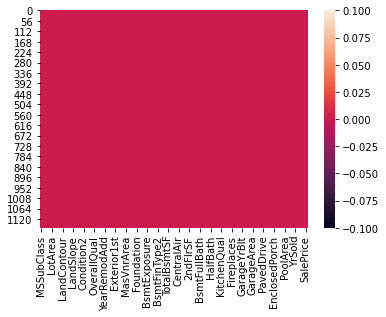

In [12]:
#Checking the nan values by plotting heat map
sns.heatmap(data.isnull())

After plotting we can see no presence of nan values

In [13]:
#seperating the categorical columns from the dataset
cat_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [14]:
#seperating the numerical columns from the dataset
num_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]!='object':
        num_col.append(x)
print(num_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Categorical columns

In [93]:
#checking number of categories in categorical columns
for i in cat_col:
    print('The types of classes in {} categorical column are {} \n'.format(i,data[i].value_counts()))

The types of classes in MSZoning categorical column are 3    642
4     94
1     43
2      9
0      5
Name: MSZoning, dtype: int64 

The types of classes in Street categorical column are 1    791
0      2
Name: Street, dtype: int64 

The types of classes in LotShape categorical column are 3    498
0    275
1     16
2      4
Name: LotShape, dtype: int64 

The types of classes in LandContour categorical column are 3    725
1     29
0     28
2     11
Name: LandContour, dtype: int64 

The types of classes in Utilities categorical column are 0    793
Name: Utilities, dtype: int64 

The types of classes in LotConfig categorical column are 4    577
0    147
1     44
2     23
3      2
Name: LotConfig, dtype: int64 

The types of classes in LandSlope categorical column are 0    758
1     34
2      1
Name: LandSlope, dtype: int64 

The types of classes in Neighborhood categorical column are 0.454545    119
0.136364    108
0.227273     58
0.863636     57
0.272727     56
0.681818     48
0.636364   

In [94]:
#checking number of categories in categorical columns
for i in cat_col:
    print('The number of categories in {} column are {}'.format(i,len(data[i].unique())))

The number of categories in MSZoning column are 5
The number of categories in Street column are 2
The number of categories in LotShape column are 4
The number of categories in LandContour column are 4
The number of categories in Utilities column are 1
The number of categories in LotConfig column are 5
The number of categories in LandSlope column are 3
The number of categories in Neighborhood column are 23
The number of categories in Condition1 column are 9
The number of categories in Condition2 column are 2
The number of categories in BldgType column are 5
The number of categories in HouseStyle column are 7
The number of categories in RoofStyle column are 5
The number of categories in RoofMatl column are 4
The number of categories in Exterior1st column are 12
The number of categories in Exterior2nd column are 14
The number of categories in MasVnrType column are 4
The number of categories in ExterQual column are 4
The number of categories in ExterCond column are 3
The number of categori

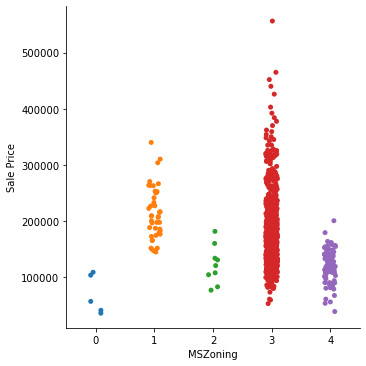

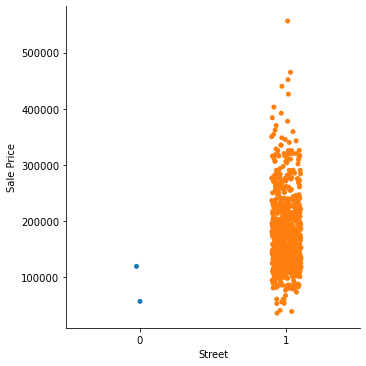

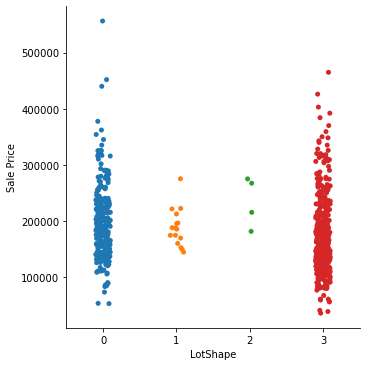

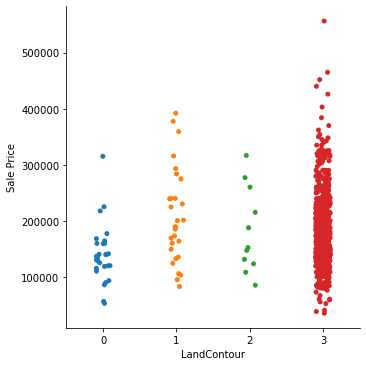

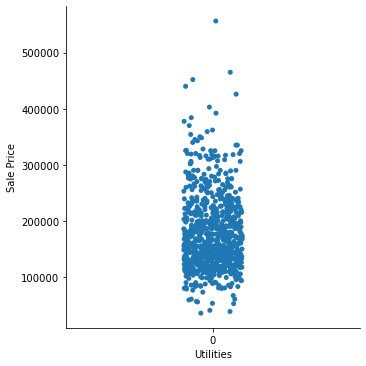

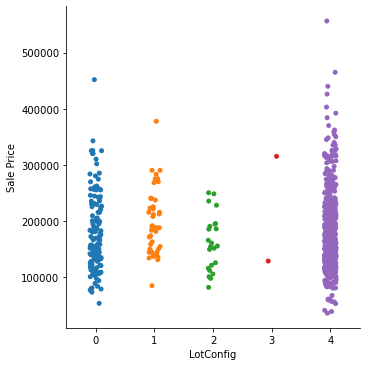

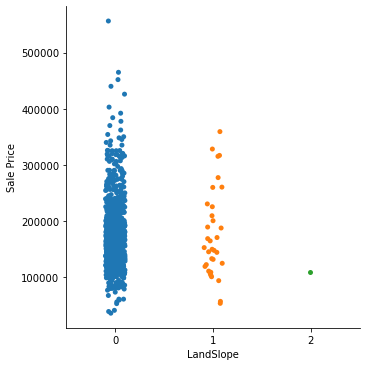

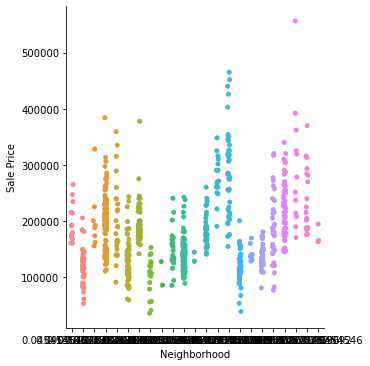

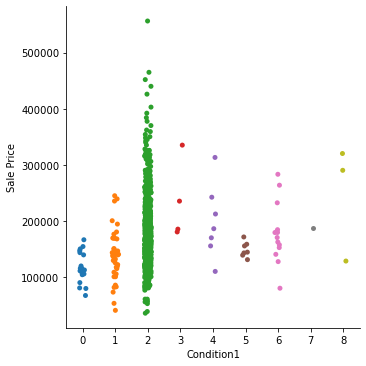

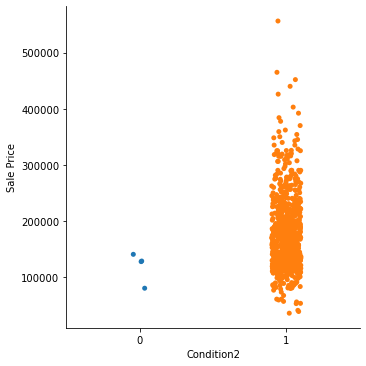

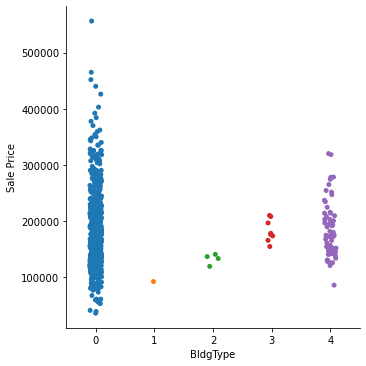

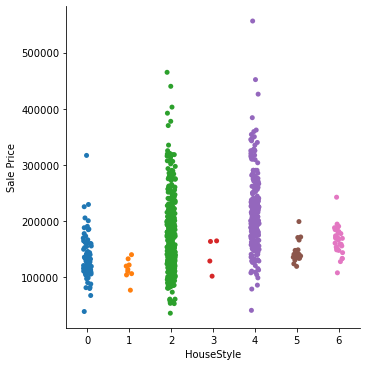

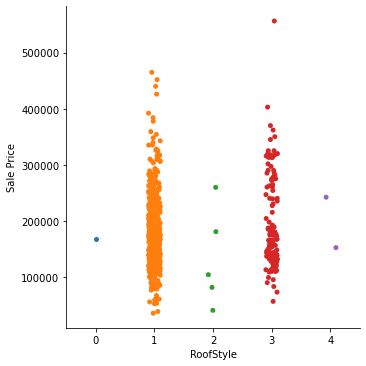

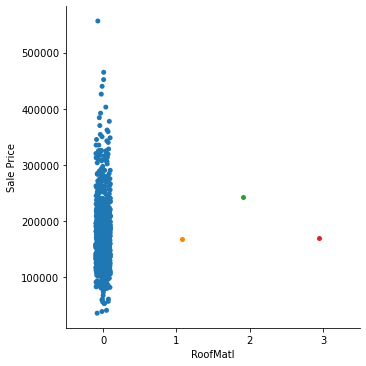

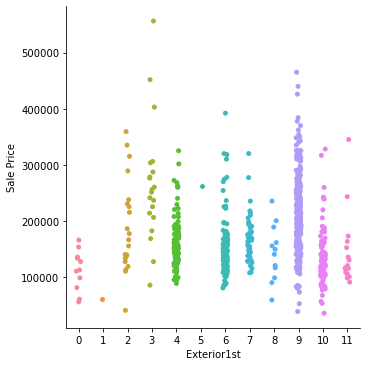

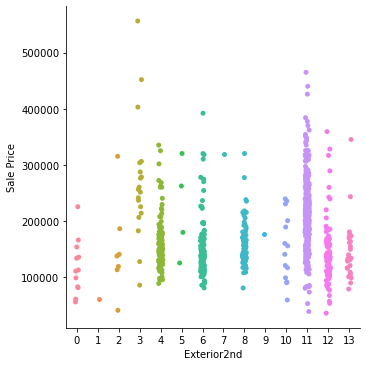

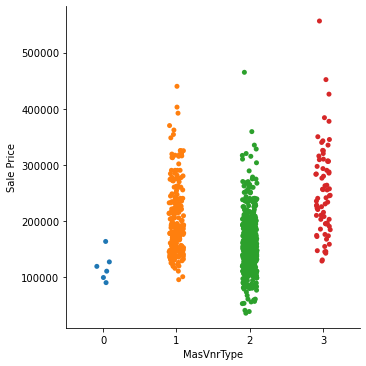

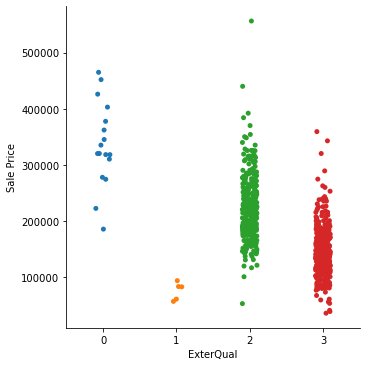

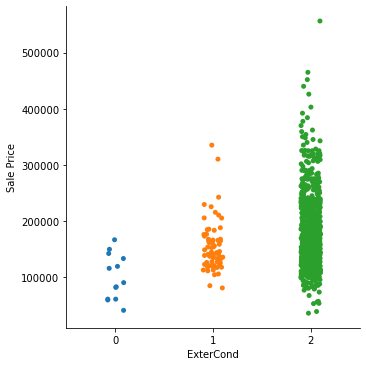

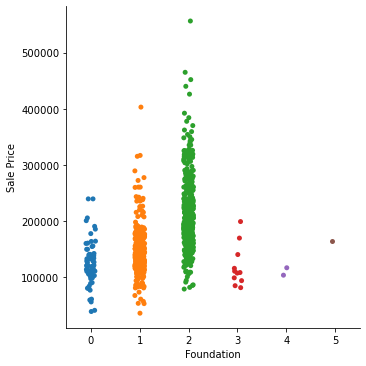

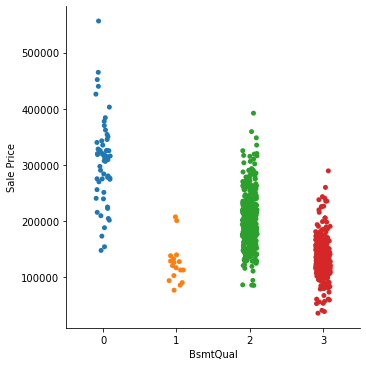

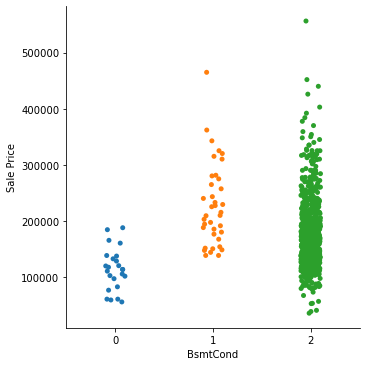

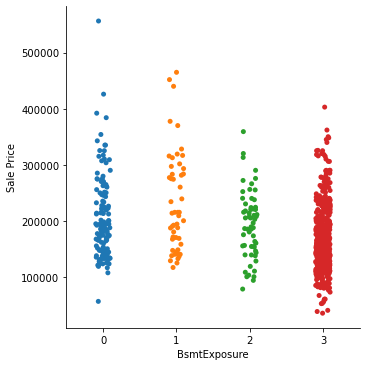

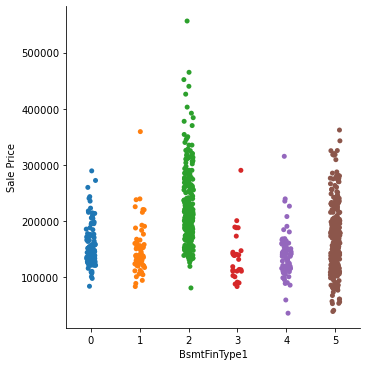

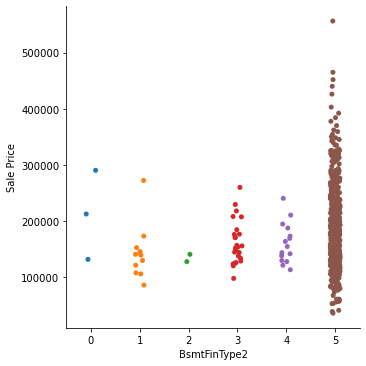

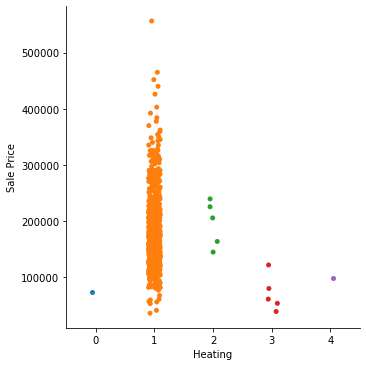

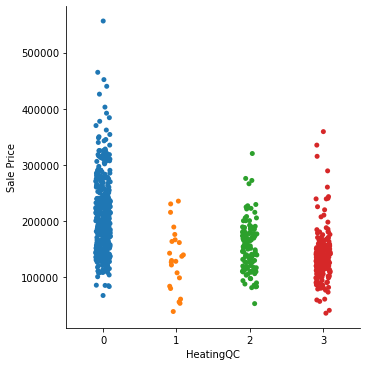

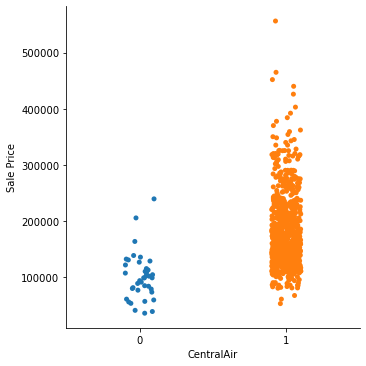

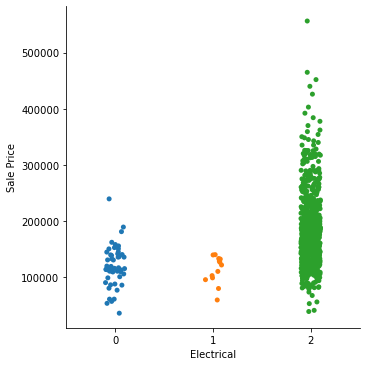

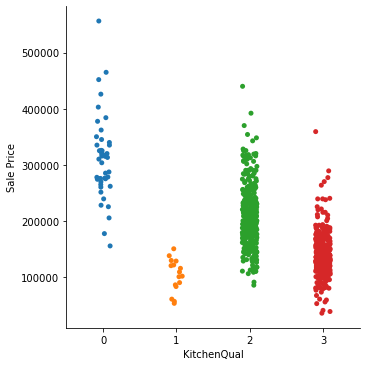

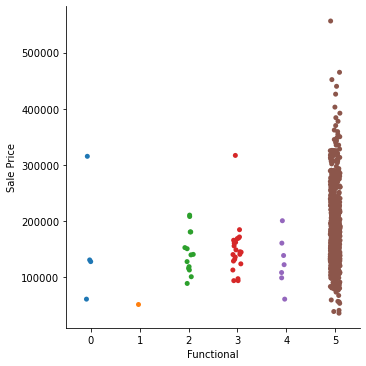

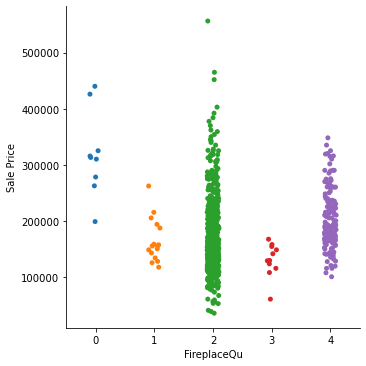

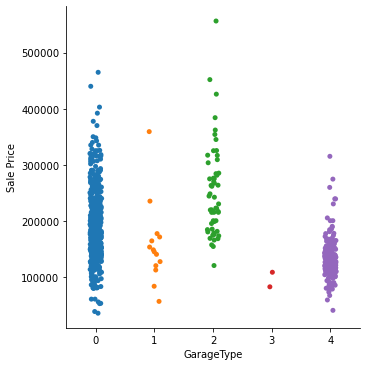

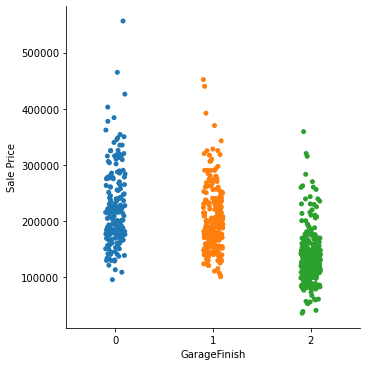

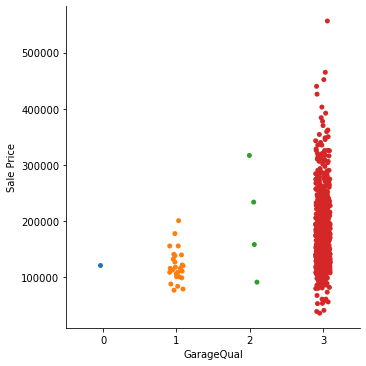

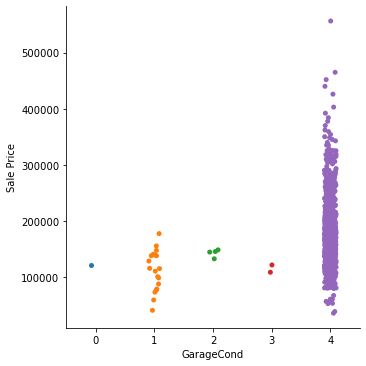

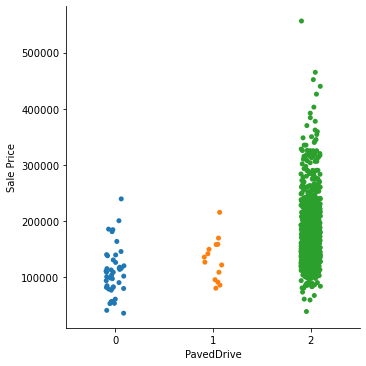

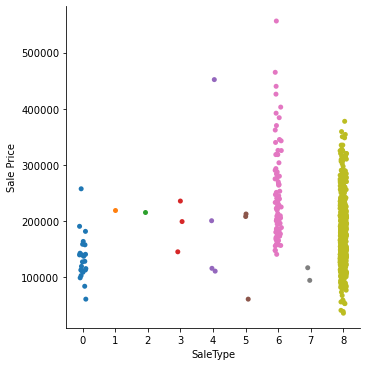

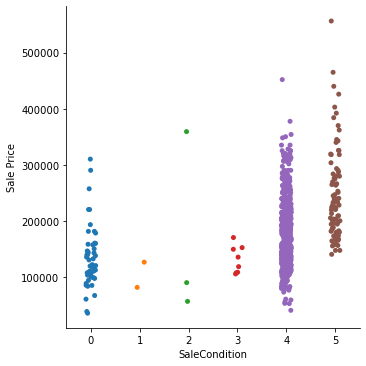

In [95]:
#plotting Strip plots on categorical variables
for i in cat_col:
    sns.catplot(x=i,y='SalePrice',data=data)
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.show()

### Numerical columns

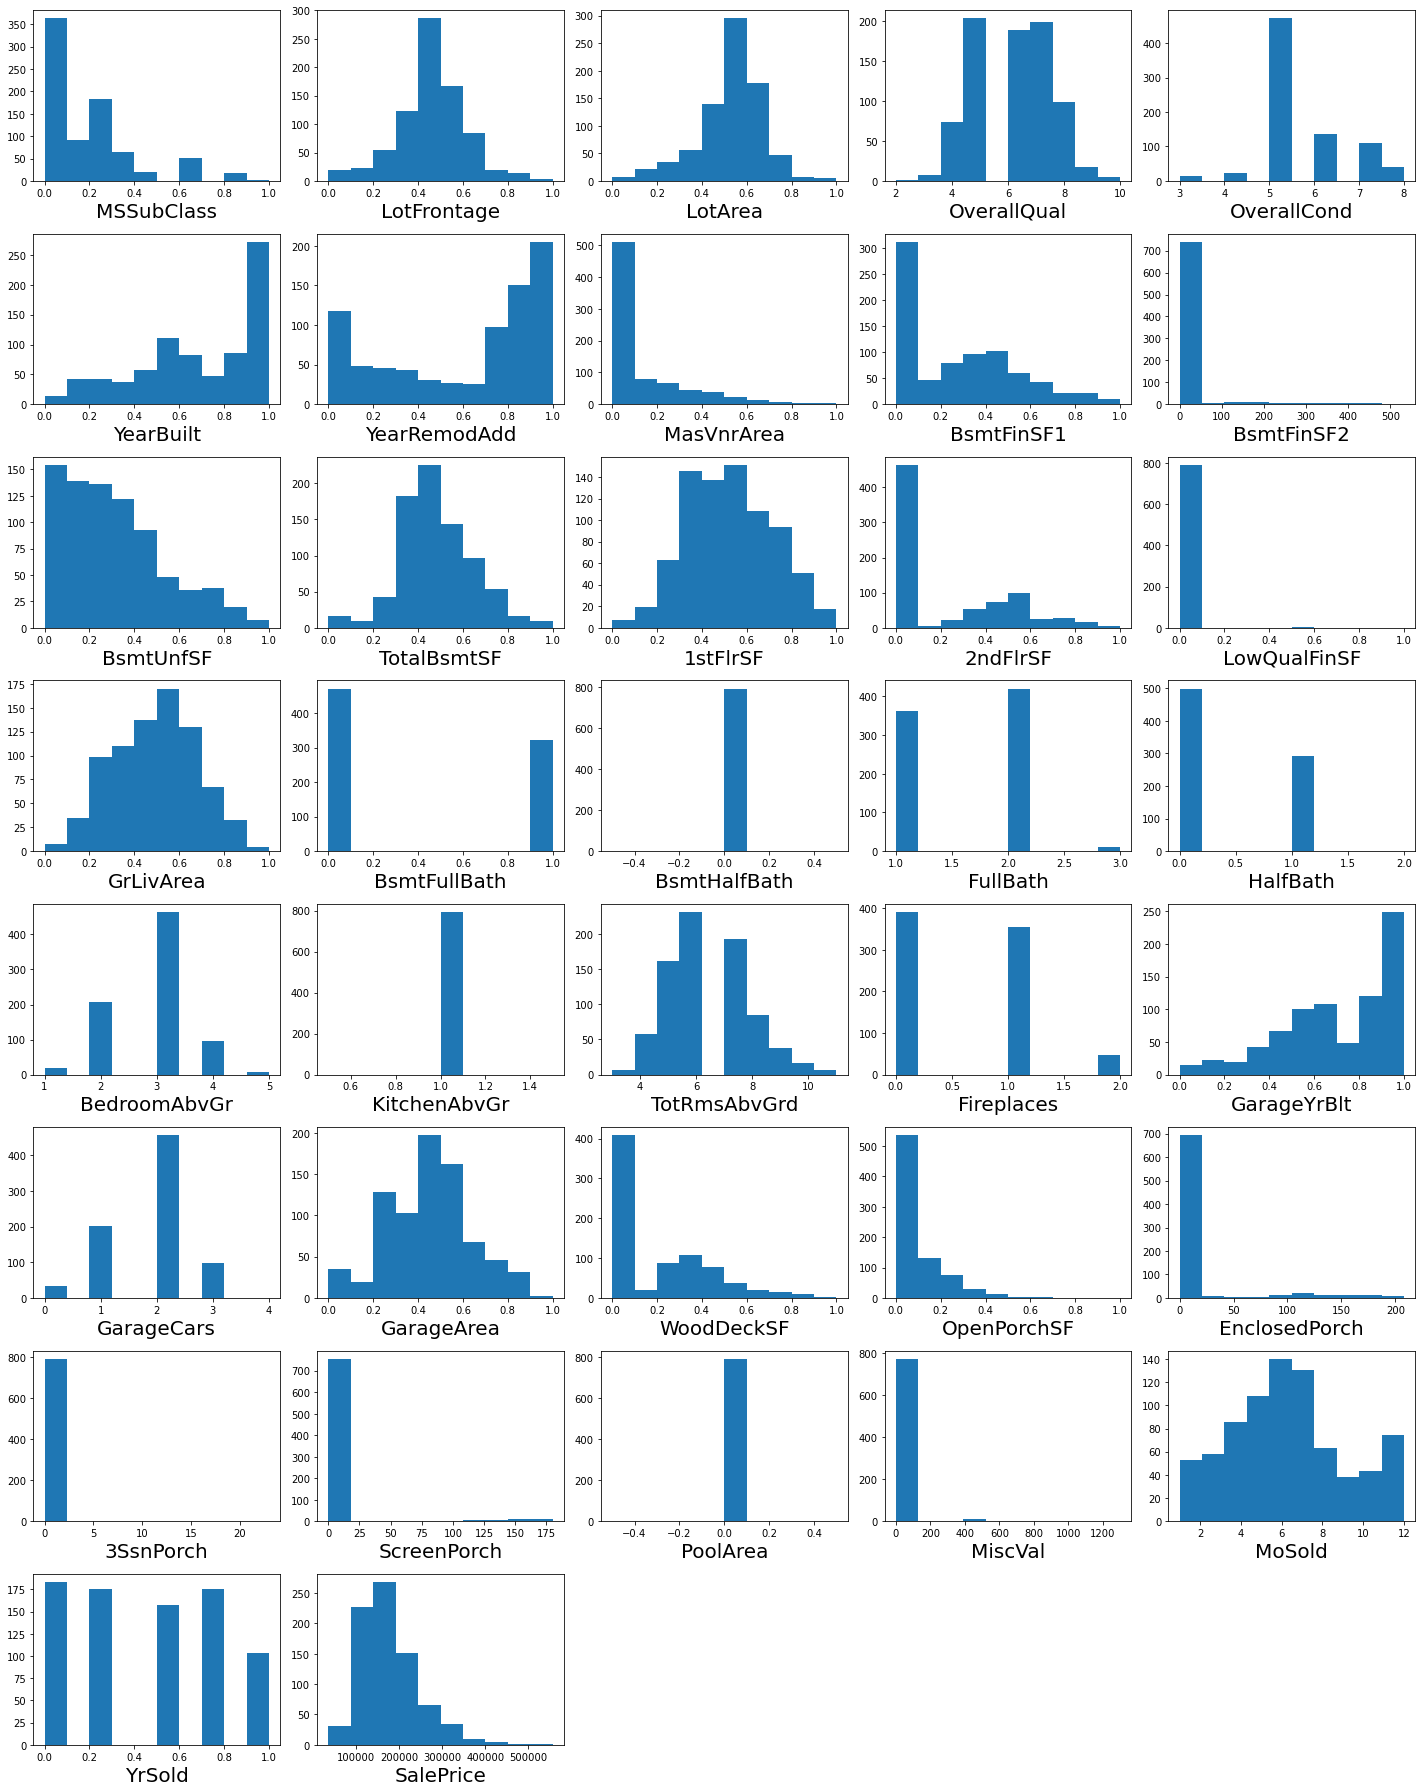

In [96]:
#Lets again check for data using histogram plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        plt.hist(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

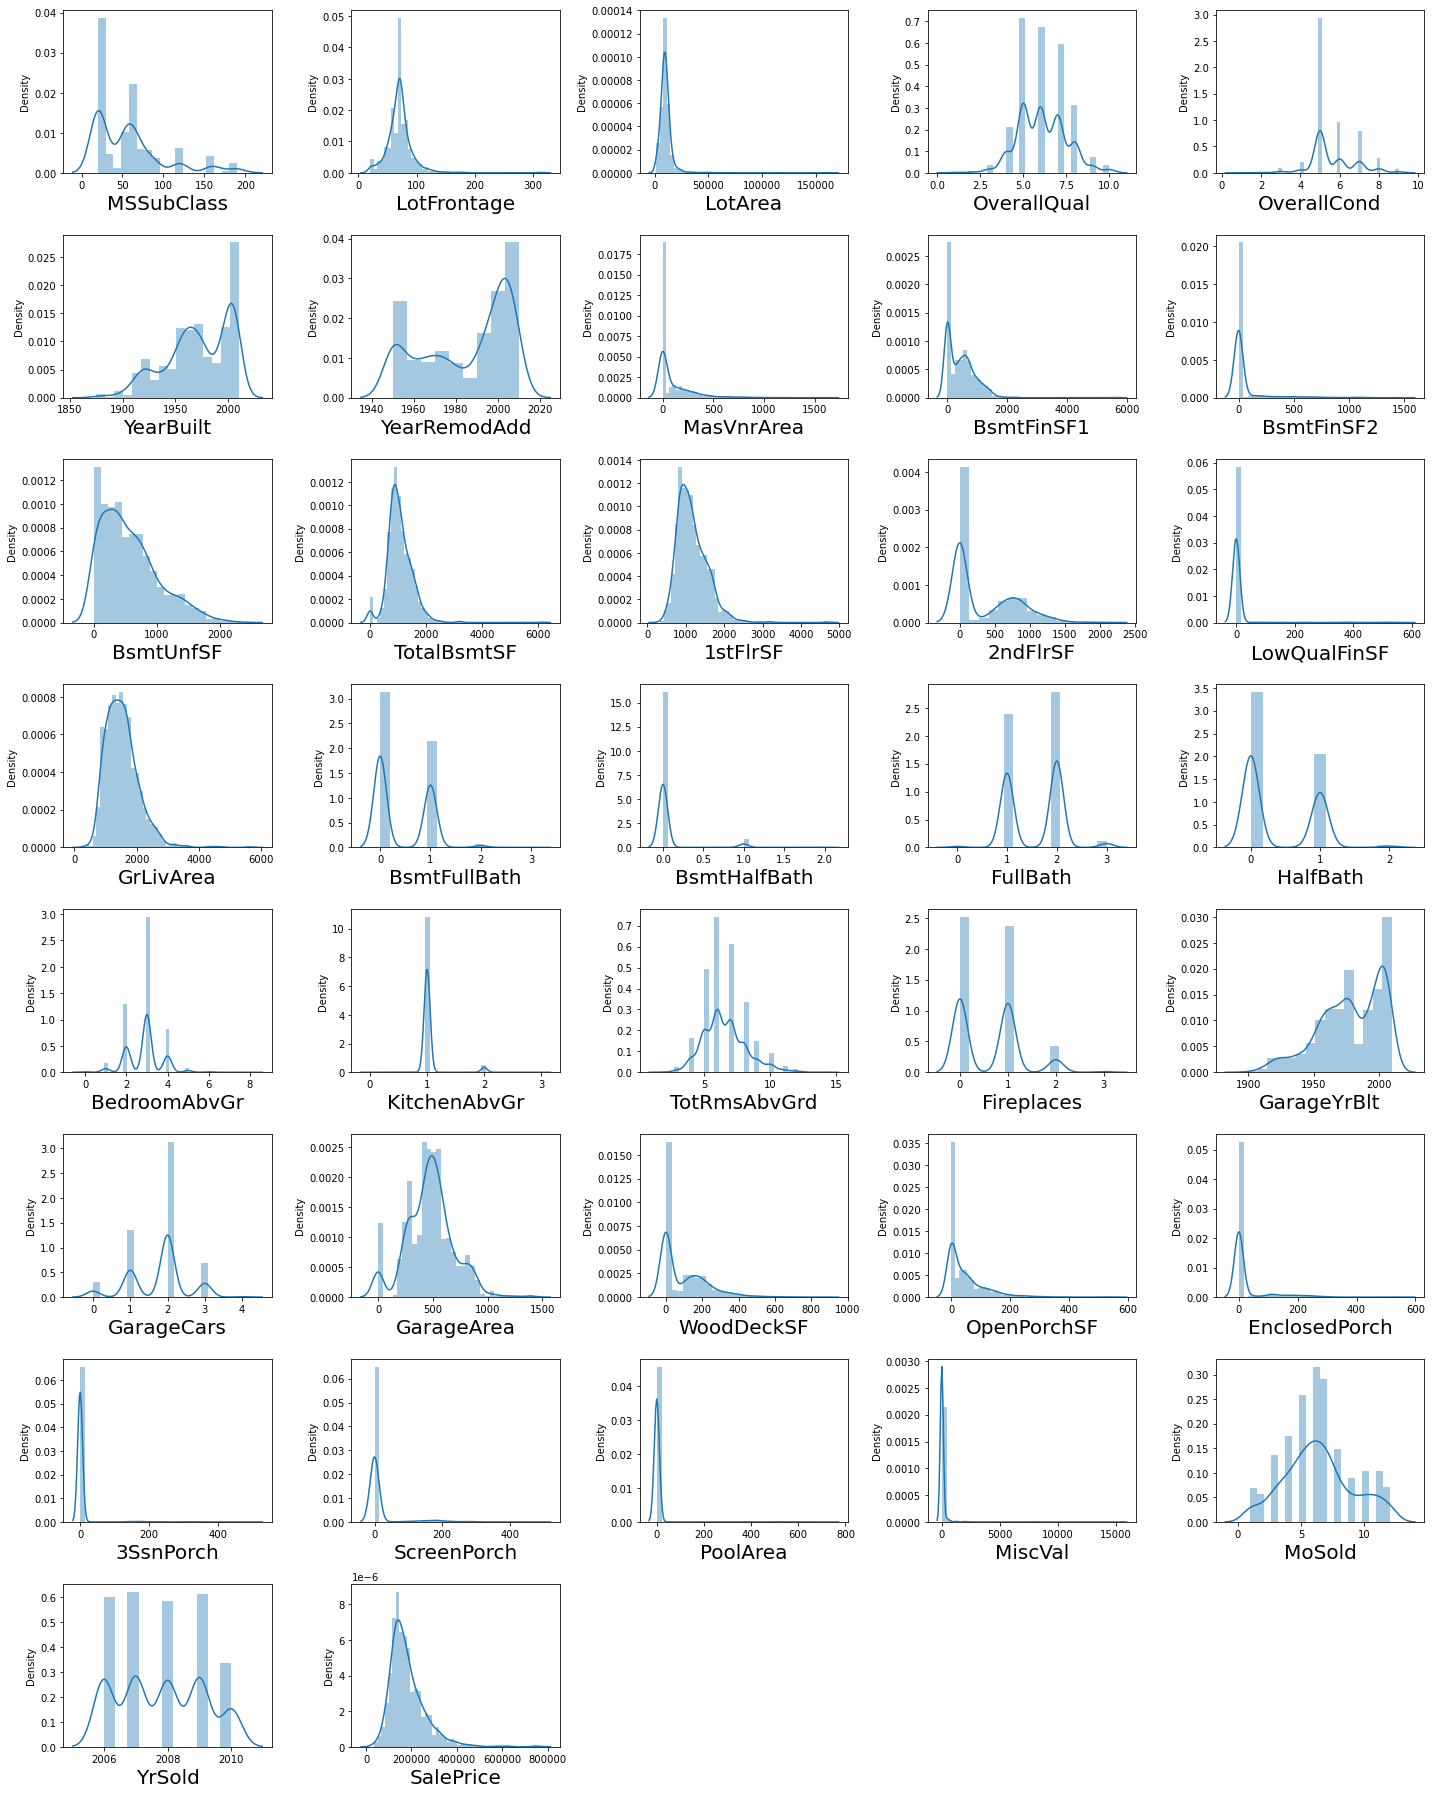

In [16]:
#Lets again check for data using dist plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
#Applying log transformation on skewed columns
col=['LotFrontage','LotArea','1stFlrSF','GrLivArea']
for i in col:
    data[i]=np.log(1+data[i])

In [18]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,4.276506,8.502891,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.865891,0,0,6.865891,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,4.564348,9.671934,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.704361,0,0,7.704361,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,4.532599,9.202409,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.028201,886,0,7.607878,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,4.663439,9.371779,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.520235,0,0,7.520235,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,4.276506,9.719324,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379632,0,0,7.379632,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


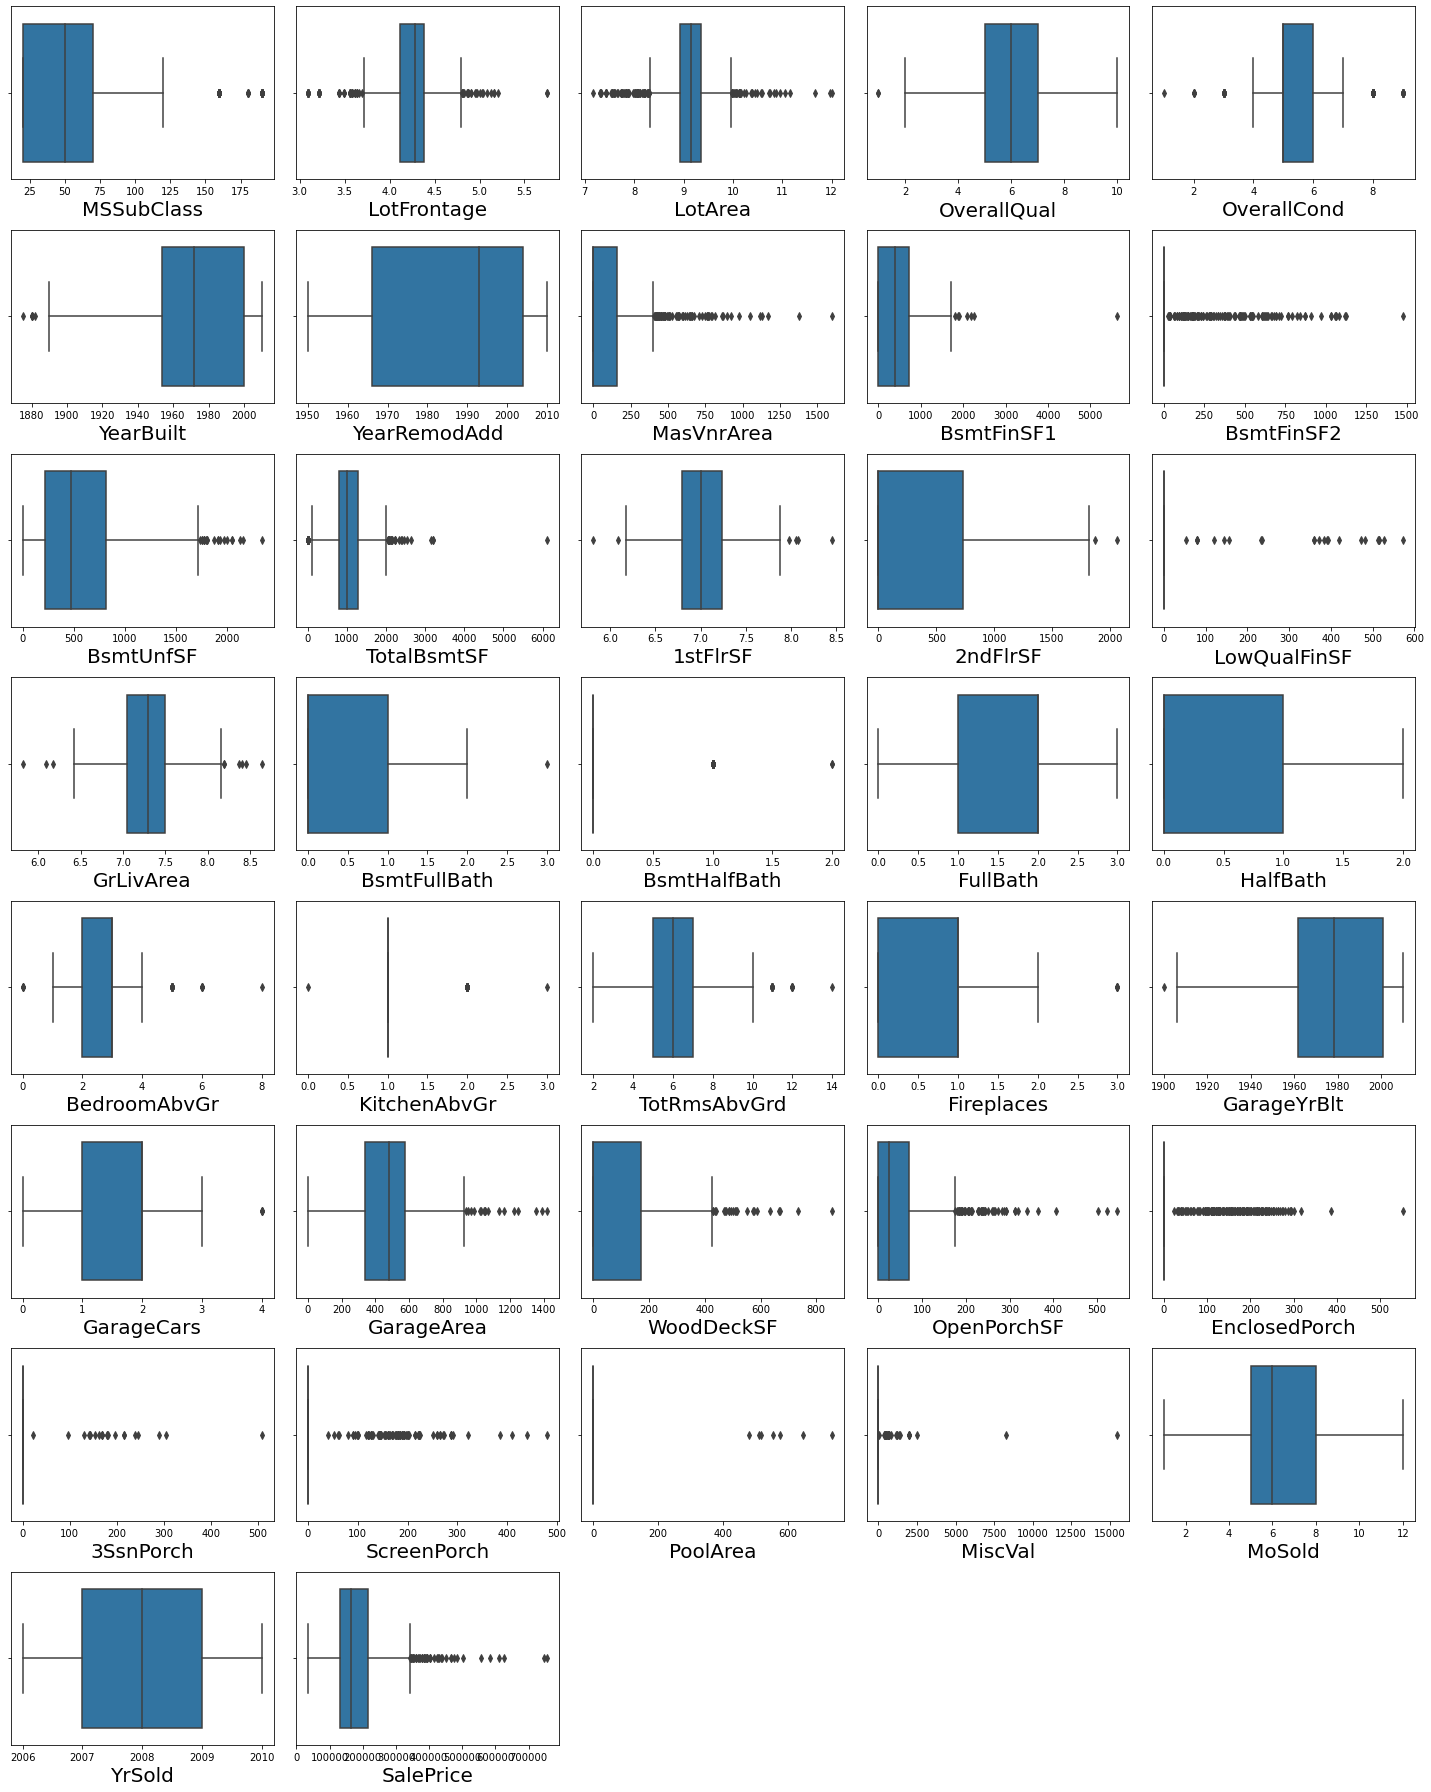

In [19]:
#Lets again check for data using dist plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
#lets remove our outiers using z_score
z=np.abs(stats.zscore(data[col]))#abs=absolute numberprint(z)
print(z)

[[1.50830058 0.14626083 1.21764042 ... 0.2733768  0.07684505 0.0871313 ]
 [0.87704243 1.07739088 1.09744261 ... 3.79511691 0.07684505 0.0871313 ]
 [0.07709478 0.97468821 0.16763133 ... 0.2733768  0.07684505 0.0871313 ]
 ...
 [2.46243779 3.27502729 2.7435243  ... 0.2733768  0.07684505 0.0871313 ]
 [0.31562908 0.96873266 0.13826922 ... 0.2733768  0.07684505 0.0871313 ]
 [0.07709478 0.14626083 0.29301727 ... 0.2733768  0.07684505 0.0871313 ]]


In [21]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [   1    1    4    7   14   19   20   22   25   27   32   32   32   33
   38   43   47   48   48   48   51   52   63   64   66   66   68   72
   72   73   74   76   77   91   93   93   94   95   96   97   98   98
  103  103  103  103  106  106  107  112  113  115  119  119  119  119
  120  127  127  133  133  138  138  140  141  141  141  141  141  142
  142  143  146  150  152  153  156  156  157  162  164  166  170  174
  174  176  178  178  184  187  191  192  192  192  196  196  205  206
  210  210  211  211  212  214  216  219  226  228  231  231  232  232
  237  241  241  243  245  245  247  249  253  254  255  257  259  269
  272  284  284  289  290  297  299  299  301  304  305  305  305  305
  308  309  310  310  312  313  315  318  319  320  325  333  335  338
  338  351  352  352  355  356  357  361  361  361  361  361  362  362
  363  363  372  378  378  379  380  381  385  387  389  389  389  395
  401  401  403  403  403  403  408  408  411  413  414  414  41

In [22]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [23]:
data.shape

(793, 76)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     793 non-null    int64  
 1   MSZoning       793 non-null    object 
 2   LotFrontage    793 non-null    float64
 3   LotArea        793 non-null    float64
 4   Street         793 non-null    object 
 5   LotShape       793 non-null    object 
 6   LandContour    793 non-null    object 
 7   Utilities      793 non-null    object 
 8   LotConfig      793 non-null    object 
 9   LandSlope      793 non-null    object 
 10  Neighborhood   793 non-null    object 
 11  Condition1     793 non-null    object 
 12  Condition2     793 non-null    object 
 13  BldgType       793 non-null    object 
 14  HouseStyle     793 non-null    object 
 15  OverallQual    793 non-null    int64  
 16  OverallCond    793 non-null    int64  
 17  YearBuilt      793 non-null    int64  
 18  YearRemod

In [25]:
#Encoding the columns using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for i in cols:
        data[i]=lab_enc.fit_transform(data[i])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,4.276506,8.502891,1,0,3,0,4,0,11,2,1,4,2,6,5,1976,1976,1,0,7,8,2,0.0,3,2,1,2,2,3,0,120,5,0,958,1078,1,3,1,2,6.865891,0,0,6.865891,0,0,2,0,2,1,3,5,5,1,4,0,1977.0,1,2,440,3,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000
2,60,3,4.532599,9.202409,1,0,3,0,1,0,13,2,1,0,4,7,5,1996,1997,1,0,6,6,2,0.0,2,2,2,2,2,0,2,862,5,0,255,1117,1,0,1,2,7.028201,886,0,7.607878,1,0,2,1,3,1,3,8,5,1,4,0,1997.0,2,2,455,3,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,20,3,4.663439,9.371779,1,0,3,0,4,0,12,2,1,0,2,6,6,1977,1977,3,0,7,8,1,480.0,3,2,1,2,2,3,1,705,5,0,1139,1844,1,0,1,2,7.520235,0,0,7.520235,0,0,2,0,3,1,3,7,5,1,4,0,1977.0,1,2,546,3,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000
5,60,3,4.077537,9.550733,1,0,3,0,4,0,6,2,1,0,4,7,5,2006,2006,1,0,9,11,2,0.0,2,2,2,2,2,0,5,0,5,0,879,879,1,0,1,2,6.779922,984,0,7.530480,0,0,2,1,4,1,2,9,5,1,2,2,2006.0,0,3,660,3,4,2,100,17,0,0,0,0,0,11,2006,6,5,219210
6,20,3,4.276506,9.336268,1,0,3,0,4,0,17,2,1,0,2,5,6,1957,1996,3,0,10,12,1,180.0,3,2,1,2,2,3,0,1302,5,0,90,1392,1,3,1,2,7.239215,0,0,7.239215,1,0,1,1,3,1,3,5,4,1,2,4,1957.0,2,2,528,3,4,2,0,0,0,0,95,0,0,5,2010,8,4,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,30,3,3.828641,9.013474,1,3,3,0,4,0,5,2,1,0,2,3,3,1914,1950,1,0,8,10,2,0.0,3,0,0,3,0,3,4,203,5,0,661,864,1,3,0,1,6.762730,0,0,6.762730,1,0,1,0,2,1,3,5,5,0,2,4,1938.0,2,1,200,3,1,2,0,0,96,0,0,0,0,6,2010,8,4,58500
1163,20,3,4.276506,9.192176,1,0,3,0,4,0,17,2,1,0,2,5,5,1967,1967,1,0,6,6,1,31.0,3,1,1,3,2,3,1,450,5,0,432,882,1,3,1,2,6.803505,0,0,6.803505,0,0,1,0,3,1,3,5,5,0,2,4,1970.0,2,1,280,3,4,2,0,0,0,0,0,0,0,2,2010,8,4,122000
1164,20,3,4.219508,9.080004,1,3,3,0,4,0,5,1,1,0,2,4,5,1949,2003,1,0,9,11,2,0.0,3,2,1,3,2,3,5,0,5,0,0,0,1,0,1,2,7.027315,0,0,7.027315,0,0,2,0,2,1,2,5,5,0,2,4,2002.0,0,2,520,3,4,0,0,96,0,0,0,0,0,5,2009,8,4,108000
1166,70,0,3.931826,9.047939,1,3,3,0,4,0,7,1,1,0,4,4,4,1920,1950,2,0,2,2,2,0.0,3,0,0,3,2,3,5,0,5,0,649,649,1,3,0,2,6.476972,668,0,7.183871,0,0,1,0,3,1,3,6,5,0,2,4,1920.0,2,1,250,3,1,0,0,54,172,0,0,0,0,7,2008,8,4,40000


In [26]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,4.276506,8.502891,1,0,3,0,4,0,11,2,1,4,2,6,5,1976,1976,1,0,7,8,2,0.0,3,2,1,2,2,3,0,120,5,0,958,1078,1,3,1,2,6.865891,0,0,6.865891,0,0,2,0,2,1,3,5,5,1,4,0,1977.0,1,2,440,3,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000
2,60,3,4.532599,9.202409,1,0,3,0,1,0,13,2,1,0,4,7,5,1996,1997,1,0,6,6,2,0.0,2,2,2,2,2,0,2,862,5,0,255,1117,1,0,1,2,7.028201,886,0,7.607878,1,0,2,1,3,1,3,8,5,1,4,0,1997.0,2,2,455,3,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,20,3,4.663439,9.371779,1,0,3,0,4,0,12,2,1,0,2,6,6,1977,1977,3,0,7,8,1,480.0,3,2,1,2,2,3,1,705,5,0,1139,1844,1,0,1,2,7.520235,0,0,7.520235,0,0,2,0,3,1,3,7,5,1,4,0,1977.0,1,2,546,3,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000
5,60,3,4.077537,9.550733,1,0,3,0,4,0,6,2,1,0,4,7,5,2006,2006,1,0,9,11,2,0.0,2,2,2,2,2,0,5,0,5,0,879,879,1,0,1,2,6.779922,984,0,7.530480,0,0,2,1,4,1,2,9,5,1,2,2,2006.0,0,3,660,3,4,2,100,17,0,0,0,0,0,11,2006,6,5,219210
6,20,3,4.276506,9.336268,1,0,3,0,4,0,17,2,1,0,2,5,6,1957,1996,3,0,10,12,1,180.0,3,2,1,2,2,3,0,1302,5,0,90,1392,1,3,1,2,7.239215,0,0,7.239215,1,0,1,1,3,1,3,5,4,1,2,4,1957.0,2,2,528,3,4,2,0,0,0,0,95,0,0,5,2010,8,4,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,30,3,3.828641,9.013474,1,3,3,0,4,0,5,2,1,0,2,3,3,1914,1950,1,0,8,10,2,0.0,3,0,0,3,0,3,4,203,5,0,661,864,1,3,0,1,6.762730,0,0,6.762730,1,0,1,0,2,1,3,5,5,0,2,4,1938.0,2,1,200,3,1,2,0,0,96,0,0,0,0,6,2010,8,4,58500
1163,20,3,4.276506,9.192176,1,0,3,0,4,0,17,2,1,0,2,5,5,1967,1967,1,0,6,6,1,31.0,3,1,1,3,2,3,1,450,5,0,432,882,1,3,1,2,6.803505,0,0,6.803505,0,0,1,0,3,1,3,5,5,0,2,4,1970.0,2,1,280,3,4,2,0,0,0,0,0,0,0,2,2010,8,4,122000
1164,20,3,4.219508,9.080004,1,3,3,0,4,0,5,1,1,0,2,4,5,1949,2003,1,0,9,11,2,0.0,3,2,1,3,2,3,5,0,5,0,0,0,1,0,1,2,7.027315,0,0,7.027315,0,0,2,0,2,1,2,5,5,0,2,4,2002.0,0,2,520,3,4,0,0,96,0,0,0,0,0,5,2009,8,4,108000
1166,70,0,3.931826,9.047939,1,3,3,0,4,0,7,1,1,0,4,4,4,1920,1950,2,0,2,2,2,0.0,3,0,0,3,2,3,5,0,5,0,649,649,1,3,0,2,6.476972,668,0,7.183871,0,0,1,0,3,1,3,6,5,0,2,4,1920.0,2,1,250,3,1,0,0,54,172,0,0,0,0,7,2008,8,4,40000


In [27]:
#scailing the data of numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=['MSSubClass','LotFrontage','LotArea','Neighborhood','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','YrSold']
for i in cols:
    data[i]=scaler.fit_transform(data[i].values.reshape(-1,1))
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.6250,3,0.496794,0.311905,1,0,3,0,4,0,0.500000,2,1,4,2,6,5,0.697248,0.433333,1,0,7,8,2,0.000000,3,2,1,2,2,3,0,0.076336,5,0,0.502887,0.499537,1,3,1,2,0.441525,0.000000,0.0,0.266769,0,0,2,0,2,1,3,5,5,1,4,0,0.67,1,2,0.417854,3,4,2,0.000000,0.391969,0,0,0,0,0,2,0.25,8,4,128000
2,0.2500,3,0.647800,0.570212,1,0,3,0,1,0,0.590909,2,1,0,4,7,5,0.880734,0.783333,1,0,6,6,2,0.000000,2,2,2,2,2,0,2,0.548346,5,0,0.133858,0.517609,1,0,1,2,0.550220,0.581747,0.0,0.715588,1,0,2,1,3,1,3,8,5,1,4,0,0.87,2,2,0.432099,3,4,2,0.384615,0.248566,0,0,0,0,0,6,0.25,8,4,269790
3,0.0000,3,0.724950,0.632755,1,0,3,0,4,0,0.545455,2,1,0,2,6,6,0.706422,0.450000,3,0,7,8,1,0.750000,3,2,1,2,2,3,1,0.448473,5,0,0.597900,0.854495,1,0,1,2,0.879722,0.000000,0.0,0.662573,0,0,2,0,3,1,3,7,5,1,4,0,0.67,1,2,0.518519,3,4,2,0.000000,0.233270,0,0,0,0,0,1,1.00,0,4,190000
5,0.2500,3,0.379472,0.698836,1,0,3,0,4,0,0.272727,2,1,0,4,7,5,0.972477,0.933333,1,0,9,11,2,0.000000,2,2,2,2,2,0,5,0.000000,5,0,0.461417,0.407322,1,0,1,2,0.383954,0.646093,0.0,0.668771,0,0,2,1,4,1,2,9,5,1,2,2,0.96,0,3,0.626781,3,4,2,0.213675,0.032505,0,0,0,0,0,11,0.00,6,5,219210
6,0.0000,3,0.496794,0.619642,1,0,3,0,4,0,0.772727,2,1,0,2,5,6,0.522936,0.766667,3,0,10,12,1,0.281250,3,2,1,2,2,3,0,0.828244,5,0,0.047244,0.645042,1,3,1,2,0.691530,0.000000,0.0,0.492588,1,0,1,1,3,1,3,5,4,1,2,4,0.47,2,2,0.501425,3,4,2,0.000000,0.000000,0,0,95,0,0,5,1.00,8,4,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,0.0625,3,0.232709,0.500445,1,3,3,0,4,0,0.227273,2,1,0,2,3,3,0.128440,0.000000,1,0,8,10,2,0.000000,3,0,0,3,0,3,4,0.129135,5,0,0.346982,0.400371,1,3,0,1,0.372441,0.000000,0.0,0.204368,1,0,1,0,2,1,3,5,5,0,2,4,0.28,2,1,0.189934,3,1,2,0.000000,0.000000,96,0,0,0,0,6,1.00,8,4,58500
1163,0.0000,3,0.496794,0.566434,1,0,3,0,4,0,0.772727,2,1,0,2,5,5,0.614679,0.283333,1,0,6,6,1,0.048438,3,1,1,3,2,3,1,0.286260,5,0,0.226772,0.408712,1,3,1,2,0.399747,0.000000,0.0,0.229032,0,0,1,0,3,1,3,5,5,0,2,4,0.60,2,1,0.265907,3,4,2,0.000000,0.000000,0,0,0,0,0,2,1.00,8,4,122000
1164,0.0000,3,0.463185,0.525012,1,3,3,0,4,0,0.227273,1,1,0,2,4,5,0.449541,0.883333,1,0,9,11,2,0.000000,3,2,1,3,2,3,5,0.000000,5,0,0.000000,0.000000,1,0,1,2,0.549626,0.000000,0.0,0.364412,0,0,2,0,2,1,2,5,5,0,2,4,0.92,0,2,0.493827,3,4,0,0.000000,0.183556,0,0,0,0,0,5,0.75,8,4,108000
1166,0.3125,0,0.293552,0.513172,1,3,3,0,4,0,0.318182,1,1,0,4,4,4,0.183486,0.000000,2,0,2,2,2,0.000000,3,0,0,3,2,3,5,0.000000,5,0,0.340682,0.300741,1,3,0,2,0.181077,0.438608,0.0,0.459111,0,0,1,0,3,1,3,6,5,0,2,4,0.10,2,1,0.237417,3,1,0,0.000000,0.103250,172,0,0,0,0,7,0.50,8,4,40000


### Test dataset

In [28]:
#Importing the test dataset and reading the file
data1=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\housing test data.csv')
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [29]:
#checking for shape
data1.shape

(292, 80)

In [30]:
data1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

<AxesSubplot:>

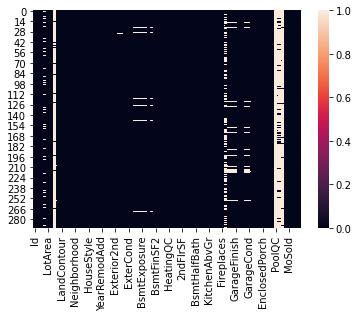

In [32]:
sns.heatmap(data1.isnull())

In [33]:
#filling the null values of numeric columns
data1['LotFrontage']=data1['LotFrontage'].fillna(data1['LotFrontage'].mean())
data1['MasVnrArea']=data1['MasVnrArea'].fillna(data1['MasVnrArea'].mean())
data1['GarageYrBlt']=data1['GarageYrBlt'].fillna(data1['GarageYrBlt'].mean())

In [34]:
#filling the null values of categorical columns
data1['MasVnrType']=data1['MasVnrType'].fillna(data1['MasVnrType'].mode()[0])
data1['BsmtQual']=data1['BsmtQual'].fillna(data1['BsmtQual'].mode()[0])
data1['BsmtCond']=data1['BsmtCond'].fillna(data1['BsmtCond'].mode()[0])
data1['BsmtExposure']=data1['BsmtExposure'].fillna(data1['BsmtExposure'].mode()[0])
data1['BsmtFinType1']=data1['BsmtFinType1'].fillna(data1['BsmtFinType1'].mode()[0])
data1['BsmtFinType2']=data1['BsmtFinType2'].fillna(data1['BsmtFinType2'].mode()[0])
data1['Electrical']=data1['Electrical'].fillna(data1['Electrical'].mode()[0])
data1['FireplaceQu']=data1['FireplaceQu'].fillna(data1['FireplaceQu'].mode()[0])
data1['GarageType']=data1['GarageType'].fillna(data1['GarageType'].mode()[0])
data1['GarageFinish']=data1['GarageFinish'].fillna(data1['GarageFinish'].mode()[0])
data1['GarageQual']=data1['GarageQual'].fillna(data1['GarageQual'].mode()[0])
data1['GarageCond']=data1['GarageCond'].fillna(data1['GarageCond'].mode()[0])

In [35]:
#Dropping the columns which are filled by NaN's more than 60%
data1.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

<AxesSubplot:>

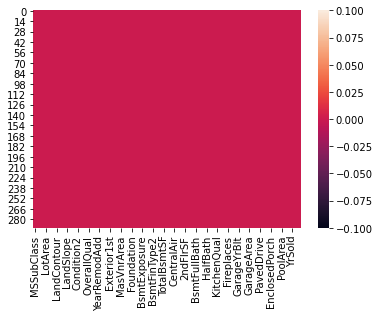

In [37]:
sns.heatmap(data1.isnull())

In [38]:
#seperating the categorical columns from the dataset
cat_col1=[]
for x in data1.dtypes.index:
    if data1.dtypes[x]=='object':
        cat_col1.append(x)
print(cat_col1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [39]:
#seperating the numerical columns from the dataset
num_col1=[]
for x in data1.dtypes.index:
    if data1.dtypes[x]!='object':
        num_col1.append(x)
print(num_col1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [40]:
#checking number of categories in categorical columns
for i in cat_col1:
    print('The types of classes in {} categorical column are {} \n'.format(i,data1[i].value_counts()))

The types of classes in MSZoning categorical column are RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64 

The types of classes in Street categorical column are Pave    290
Grvl      2
Name: Street, dtype: int64 

The types of classes in LotShape categorical column are Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64 

The types of classes in LandContour categorical column are Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64 

The types of classes in Utilities categorical column are AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64 

The types of classes in LotConfig categorical column are Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64 

The types of classes in LandSlope categorical column are Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64 

The types of classes in Neighborhood categorical column are NAmes      43
C

In [41]:
#checking number of categories in categorical columns
for i in cat_col1:
    print('The number of categories in {} column are {}'.format(i,len(data1[i].unique())))

The number of categories in MSZoning column are 4
The number of categories in Street column are 2
The number of categories in LotShape column are 4
The number of categories in LandContour column are 4
The number of categories in Utilities column are 2
The number of categories in LotConfig column are 5
The number of categories in LandSlope column are 3
The number of categories in Neighborhood column are 24
The number of categories in Condition1 column are 8
The number of categories in Condition2 column are 2
The number of categories in BldgType column are 5
The number of categories in HouseStyle column are 8
The number of categories in RoofStyle column are 5
The number of categories in RoofMatl column are 3
The number of categories in Exterior1st column are 12
The number of categories in Exterior2nd column are 14
The number of categories in MasVnrType column are 4
The number of categories in ExterQual column are 4
The number of categories in ExterCond column are 4
The number of categori

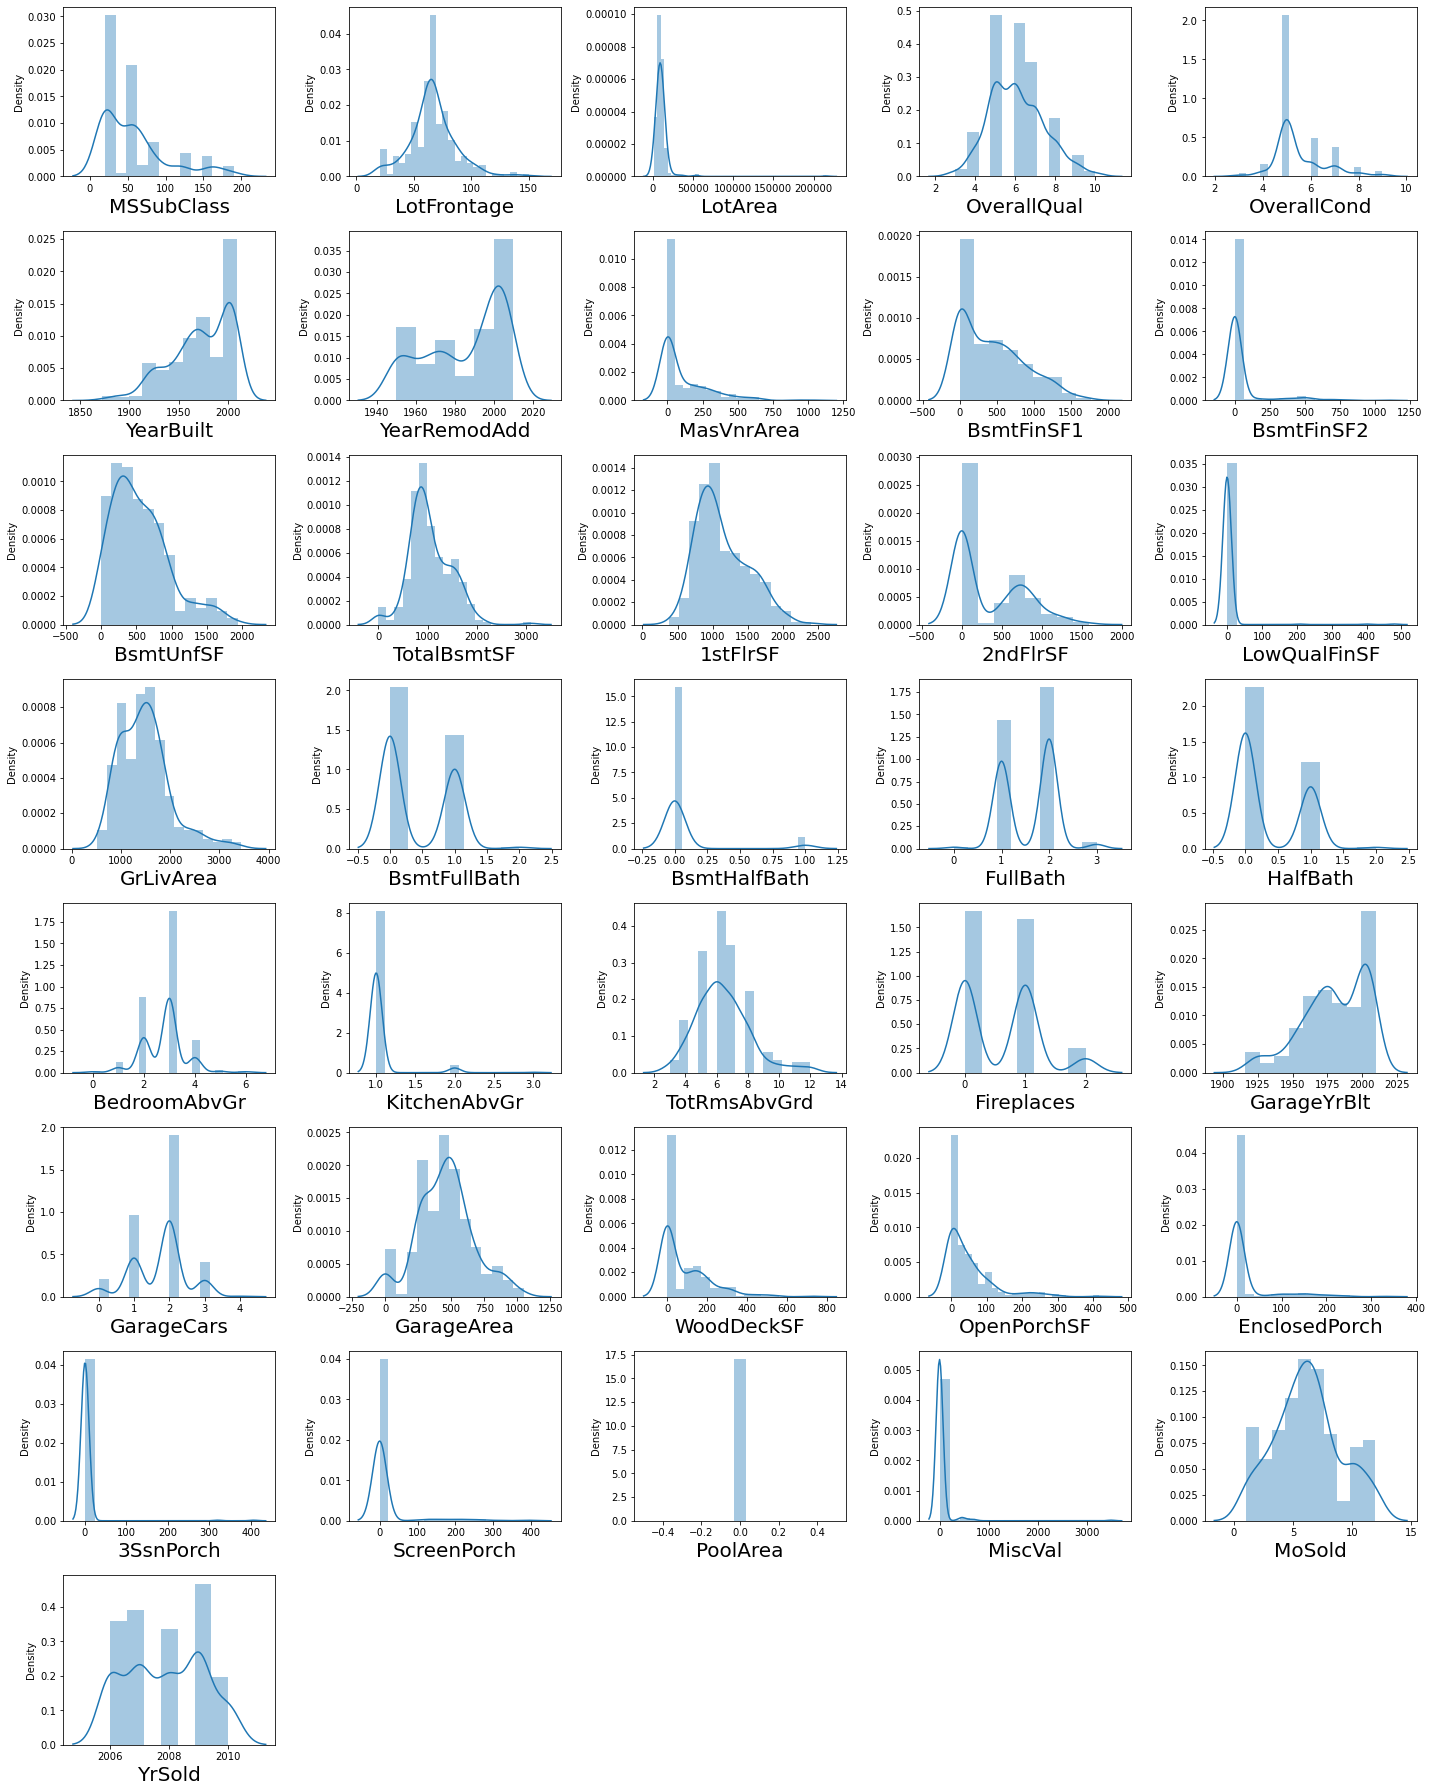

In [42]:
#Lets again check for data using dist plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in num_col1:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data1[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [43]:
#Applying log transformation on skewed columns
col=['LotFrontage','LotArea','1stFlrSF','GrLivArea']
for i in col:
    data1[i]=np.log(1+data1[i])

In [44]:
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,4.465908,9.558035,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,7.561642,0,0,7.561642,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,4.211017,8.668196,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,7.215975,0,0,7.215975,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,4.211017,9.379154,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,7.489412,0,0,7.489412,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,4.330733,9.392745,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,6.758095,704,0,7.355641,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,4.465908,9.588708,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,6.796824,1039,0,7.567346,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal


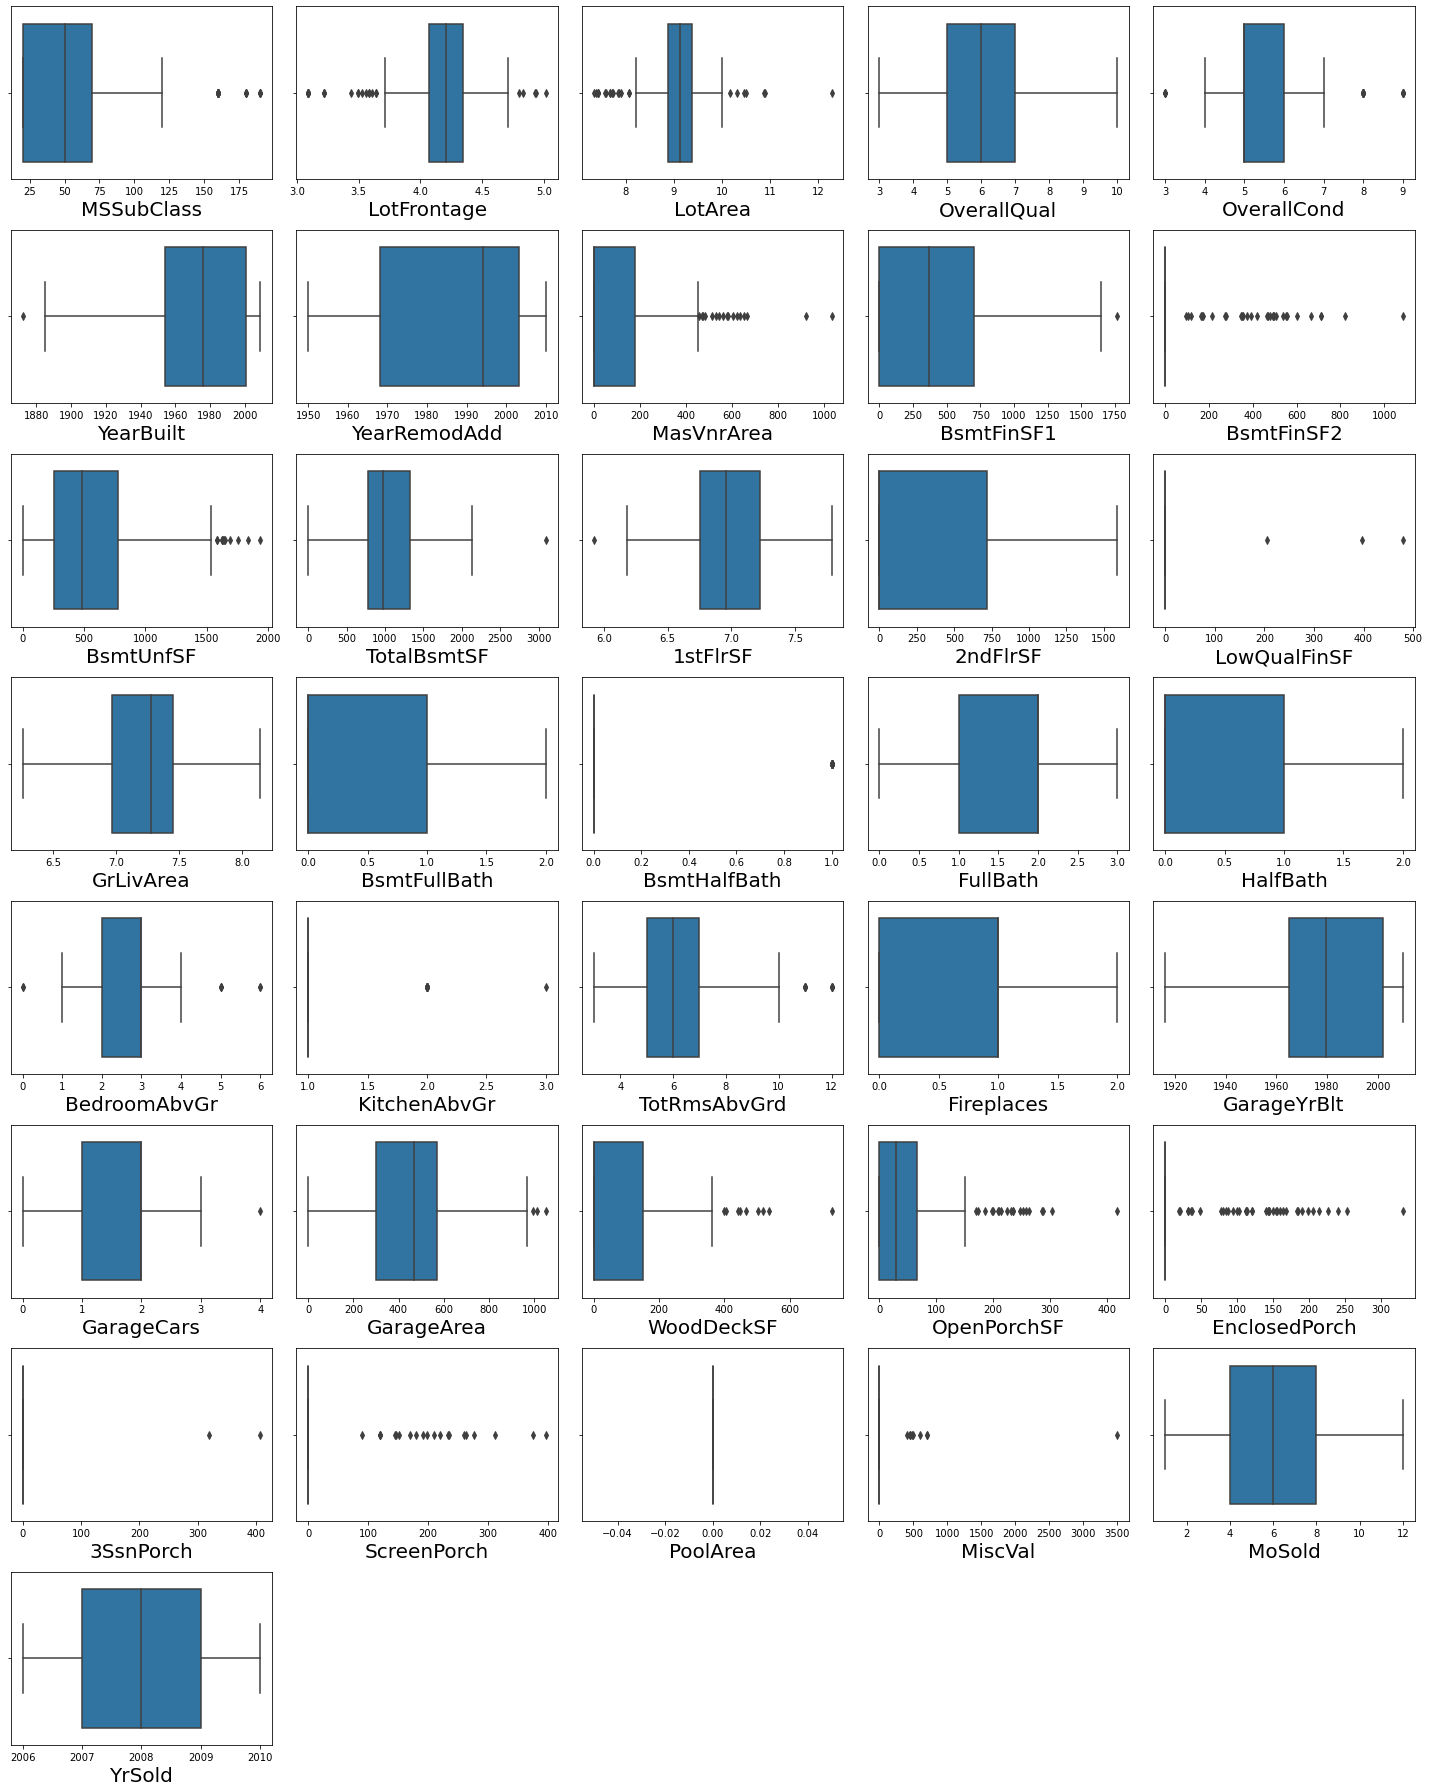

In [45]:
#Lets again check for data using dist plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in num_col1:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(data1[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [46]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal']
#lets remove our outiers using z_score
z=np.abs(stats.zscore(data1[col]))#abs=absolute numberprint(z)
print(z)

[[0.85605433 0.9187886  0.84292057 ... 0.08245314 0.25862412 0.12602122]
 [1.43198105 0.14860118 0.73867192 ... 0.08245314 0.25862412 0.12602122]
 [0.85605433 0.14860118 0.52497956 ... 0.08245314 0.25862412 0.12602122]
 ...
 [0.85605433 0.14860118 0.43301305 ... 0.08245314 0.25862412 3.00383753]
 [0.16964372 0.69501503 1.00670772 ... 0.08245314 0.25862412 0.12602122]
 [2.3471952  3.23555695 2.67702812 ... 0.08245314 0.25862412 0.12602122]]


In [47]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [  5   8   8   9  13  13  14  20  20  23  23  23  23  30  32  33  36  37
  38  46  54  55  55  55  58  60  60  65  71  71  72  73  73  79  82  82
  83  83  85  85  92 102 105 105 106 107 109 113 114 118 120 120 123 127
 127 127 129 129 130 134 141 141 141 141 142 143 144 146 146 147 151 154
 154 157 157 166 171 171 175 179 179 184 184 184 185 186 186 190 190 196
 199 199 199 199 199 201 202 208 208 210 211 215 215 217 219 233 235 237
 237 242 243 248 250 252 253 254 259 263 271 273 273 274 277 277 282 284
 286 288 289 291]


In [48]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data1=data1.drop(data1.index[index])

In [49]:
data1.shape

(202, 75)

In [50]:
#Encoding the columns using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for i in cols:
        data1[i]=lab_enc.fit_transform(data1[i])
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,4.465908,9.558035,0,0,1,0,0,0,20,2,0,0,2,9,5,2005,2006,3,0,8,9,3,200.0,1,1,2,0,2,1,2,1249,3,0,673,1922,0,0,1,3,7.561642,0,0,7.561642,1,0,2,0,3,1,2,8,3,1,2,0,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,4,2
1,120,2,4.211017,8.668196,0,0,3,0,1,0,20,2,0,3,2,8,5,1984,1984,1,0,4,4,2,0.0,1,1,1,2,2,0,2,1036,3,0,184,1220,0,2,1,3,7.215975,0,0,7.215975,1,0,1,0,1,1,2,4,3,1,0,0,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0
2,20,2,4.211017,9.379154,0,3,3,0,4,0,3,2,0,0,2,8,5,2001,2001,3,0,8,9,2,0.0,1,1,2,2,2,0,5,0,3,0,1753,1753,0,0,1,3,7.489412,0,0,7.489412,0,0,2,0,3,1,0,7,3,1,3,0,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,4,2
3,70,2,4.330733,9.392745,0,3,0,0,4,0,4,2,0,0,3,7,7,1941,1950,1,0,5,6,2,0.0,2,1,1,3,2,3,4,275,3,0,429,704,0,0,1,3,6.758095,704,0,7.355641,0,0,1,1,3,1,1,7,3,1,2,0,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,4,2
4,60,2,4.465908,9.588708,0,0,3,0,1,0,19,1,0,0,3,6,5,2007,2007,1,0,8,9,3,74.0,1,1,2,2,2,2,5,0,3,0,894,894,0,0,1,3,6.796824,1039,0,7.567346,0,0,2,1,4,1,2,9,3,1,2,2,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,20,1,4.454347,9.125654,0,3,3,0,4,0,19,2,0,0,2,9,5,2009,2009,1,0,3,3,3,162.0,0,1,2,0,2,2,2,1121,3,0,645,1766,0,0,1,3,7.477038,0,0,7.477038,1,0,2,1,2,1,0,7,3,1,2,0,2009.0,0,3,478,4,4,2,195,130,0,0,0,0,0,10,2009,3,3
283,20,2,4.543295,9.399803,0,3,3,0,4,0,14,2,0,0,2,8,5,2007,2007,3,0,8,9,3,328.0,1,1,2,0,2,3,2,1004,3,0,730,1734,0,0,1,3,7.458763,0,0,7.458763,1,0,2,0,3,1,0,7,3,1,2,0,2007.0,1,3,928,4,4,2,0,0,0,0,0,0,0,11,2007,3,3
285,20,2,4.248495,8.935904,0,3,3,0,0,0,9,2,0,0,2,4,6,1982,2006,1,0,4,7,2,0.0,2,1,1,3,2,3,0,565,3,0,280,845,0,3,1,3,6.740519,0,0,6.740519,1,0,1,0,2,1,3,4,3,0,2,3,1987.0,2,2,360,4,4,2,0,0,0,0,0,0,0,6,2007,4,2
287,20,2,4.369448,9.230829,0,3,3,0,4,0,19,2,0,0,2,8,5,2007,2007,1,0,8,9,3,468.0,2,1,2,2,2,3,2,33,3,0,1530,1563,0,0,1,3,7.355002,0,0,7.355002,0,0,2,0,3,1,2,6,3,1,2,0,2007.0,1,3,758,4,4,2,144,99,0,0,0,0,0,10,2008,4,2


In [51]:
#scailing the data of numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=['MSSubClass','LotFrontage','LotArea','Neighborhood','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','YrSold']
for i in cols:
    data1[i]=scaler.fit_transform(data1[i].values.reshape(-1,1))
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.0000,2,0.774825,0.717073,0,0,1,0,0,0,0.909091,2,0,0,2,9,5,0.967742,0.933333,3,0,8,9,3,0.342466,1,1,2,0,2,1,2,0.758809,3,0,0.383913,0.910900,0,0,1,3,0.927396,0.000000,0.0,0.714668,1,0,2,0,3,1,2,8,3,1,2,0,0.944444,0,3,0.642586,4,4,2,0.397321,0.217949,0,0,0,0,0,7,0.25,4,2
1,0.6250,2,0.616452,0.381208,0,0,3,0,1,0,0.909091,2,0,3,2,8,5,0.798387,0.566667,1,0,4,4,2,0.000000,1,1,1,2,2,0,2,0.629405,3,0,0.104963,0.578199,0,2,1,3,0.681916,0.000000,0.0,0.525497,1,0,1,0,1,1,2,4,3,1,0,0,0.711111,1,2,0.537072,4,4,2,0.140625,0.000000,0,0,0,0,0,8,0.75,0,0
2,0.0000,2,0.616452,0.649556,0,3,3,0,4,0,0.136364,2,0,0,2,8,5,0.935484,0.850000,3,0,8,9,2,0.000000,1,1,2,2,2,0,5,0.000000,3,0,1.000000,0.830806,0,0,1,3,0.876101,0.000000,0.0,0.675139,0,0,2,0,3,1,0,7,3,1,3,0,0.900000,1,2,0.496198,4,4,2,0.450893,0.645299,0,0,0,0,0,6,0.75,4,2
3,0.3125,2,0.690836,0.654685,0,3,0,0,4,0,0.181818,2,0,0,3,7,7,0.451613,0.000000,1,0,5,6,2,0.000000,2,1,1,3,2,3,4,0.167072,3,0,0.244723,0.333649,0,0,1,3,0.356747,0.516887,0.0,0.601931,0,0,1,1,3,1,1,7,3,1,2,0,0.233333,2,1,0.222433,4,4,2,0.000000,0.000000,0,0,0,0,0,7,0.75,4,2
4,0.2500,2,0.774825,0.728651,0,0,3,0,1,0,0.863636,1,0,0,3,6,5,0.983871,0.950000,1,0,8,9,3,0.126712,1,1,2,2,2,2,5,0.000000,3,0,0.509983,0.423697,0,0,1,3,0.384251,0.762849,0.0,0.717790,0,0,2,1,4,1,2,9,3,1,2,2,0.966667,0,3,0.634981,4,4,2,0.223214,0.076923,0,0,0,0,0,1,0.50,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0000,1,0.767642,0.553873,0,3,3,0,4,0,0.863636,2,0,0,2,9,5,1.000000,0.983333,1,0,3,3,3,0.277397,0,1,2,0,2,2,2,0.681045,3,0,0.367941,0.836967,0,0,1,3,0.867314,0.000000,0.0,0.668368,1,0,2,1,2,1,0,7,3,1,2,0,0.988889,0,3,0.454373,4,4,2,0.435268,0.555556,0,0,0,0,0,10,0.75,3,3
283,0.0000,2,0.822908,0.657349,0,3,3,0,4,0,0.636364,2,0,0,2,8,5,0.983871,0.950000,3,0,8,9,3,0.561644,1,1,2,0,2,3,2,0.609964,3,0,0.416429,0.821801,0,0,1,3,0.854335,0.000000,0.0,0.658366,1,0,2,0,3,1,0,7,3,1,2,0,0.966667,1,3,0.882129,4,4,2,0.000000,0.000000,0,0,0,0,0,11,0.25,3,3
285,0.0000,2,0.639739,0.482253,0,3,3,0,0,0,0.409091,2,0,0,2,4,6,0.782258,0.933333,1,0,4,7,2,0.000000,2,1,1,3,2,3,0,0.343256,3,0,0.159726,0.400474,0,3,1,3,0.344265,0.000000,0.0,0.265297,1,0,1,0,2,1,3,4,3,0,2,3,0.744444,2,2,0.342205,4,4,2,0.000000,0.000000,0,0,0,0,0,6,0.25,4,2
287,0.0000,2,0.714891,0.593571,0,3,3,0,4,0,0.863636,2,0,0,2,8,5,0.983871,0.950000,1,0,8,9,3,0.801370,2,1,2,2,2,3,2,0.020049,3,0,0.872790,0.740758,0,0,1,3,0.780648,0.000000,0.0,0.601582,0,0,2,0,3,1,2,6,3,1,2,0,0.966667,1,3,0.720532,4,4,2,0.321429,0.423077,0,0,0,0,0,10,0.50,4,2


In [52]:
#Seperating features and label in x and y
x=data.drop(columns=['SalePrice'],axis=1)
y=data['SalePrice']

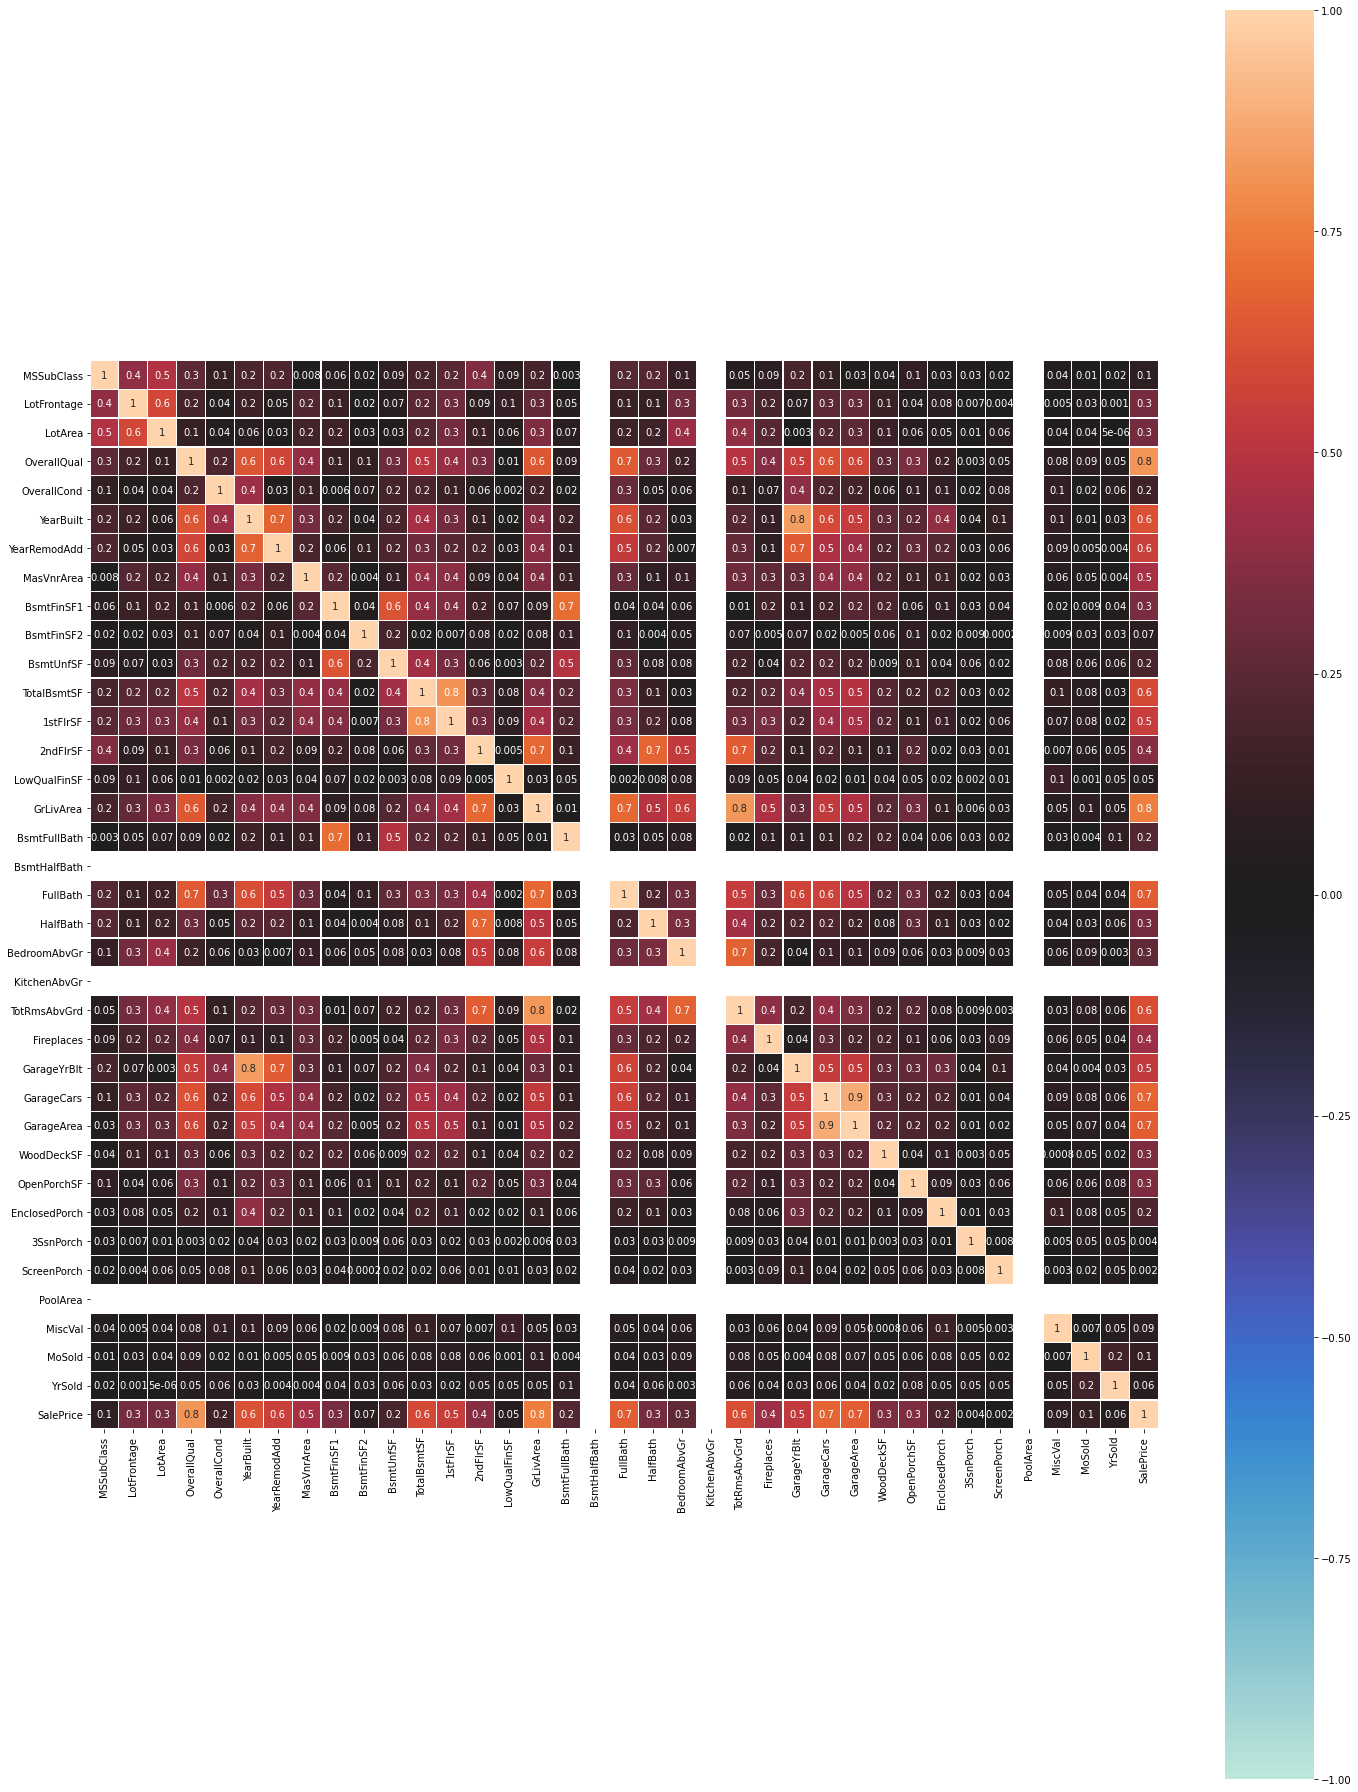

In [53]:
# lets plot heat map to find the multicollinearty with the features
df_corr=data[num_col].corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

1.In the heat map the lightly coloured are high correlated and the dark coloured are less correlated.
2.Our label is highly correlated with overallqual,yearbuilt,yearremodass,masvnarea,etc. and very less correlated with screenporch
3.There is also multicollinearty exists with some of the features between yearbuilt and garageyearbuilt,gargecars and garage area etc..

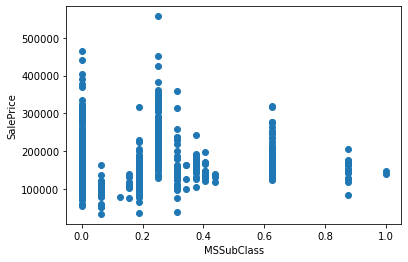

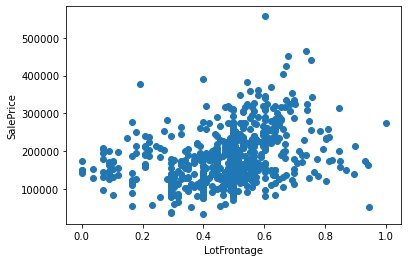

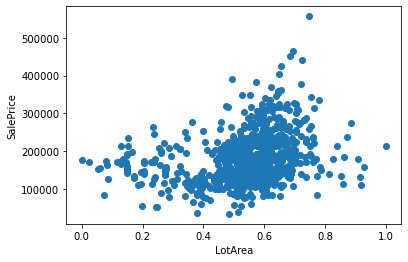

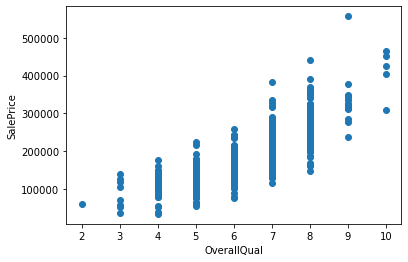

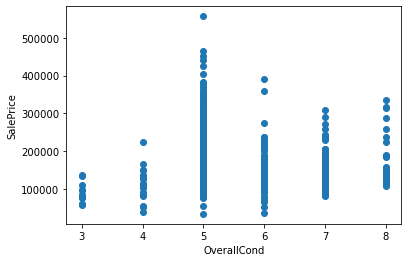

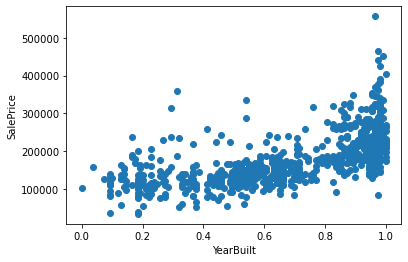

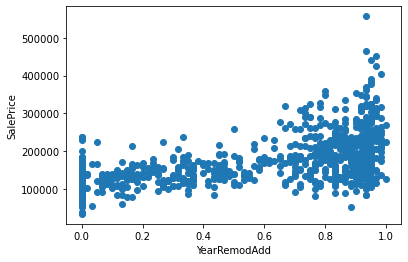

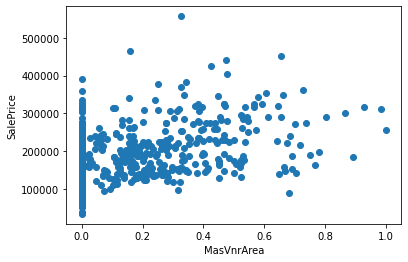

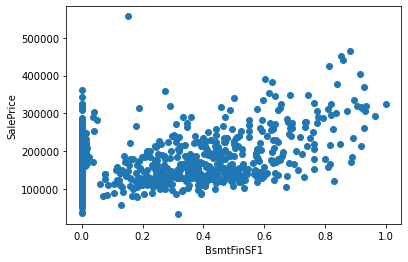

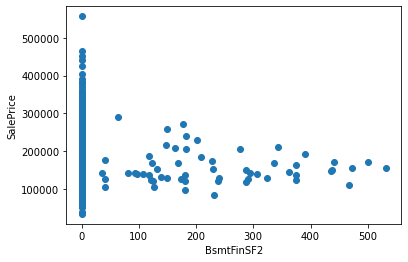

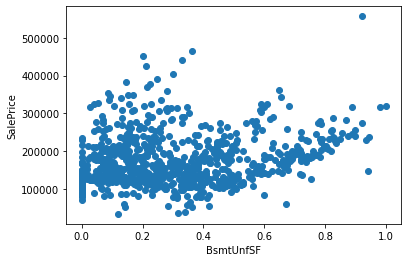

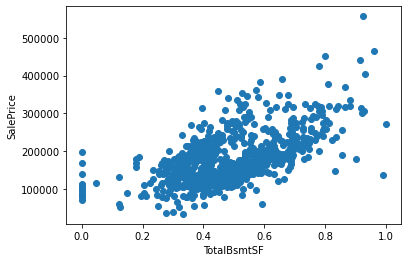

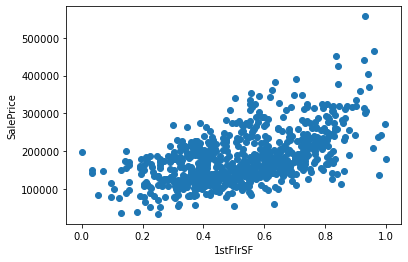

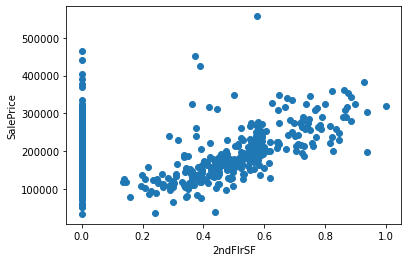

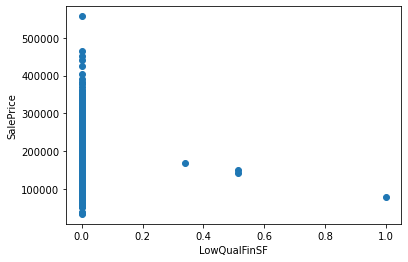

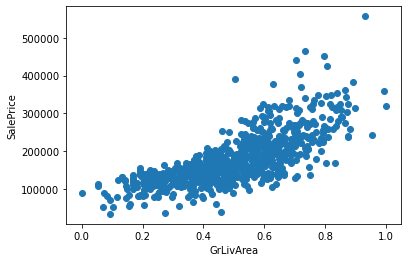

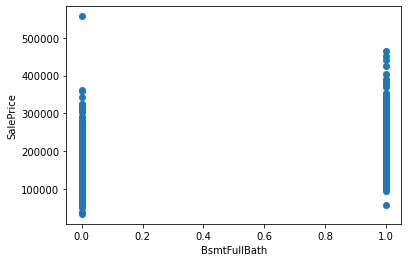

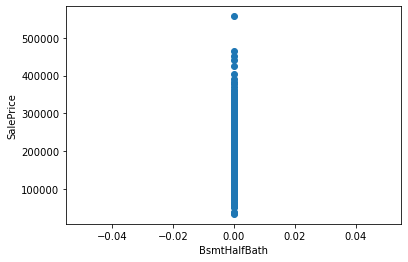

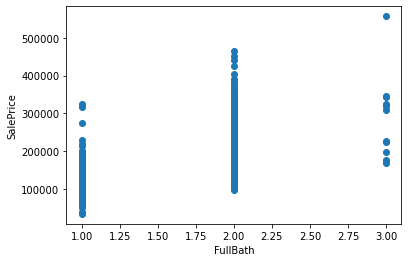

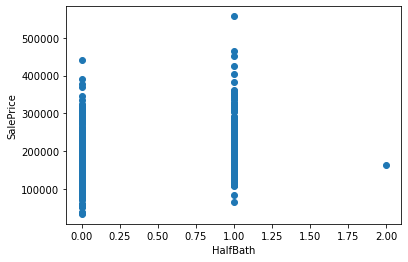

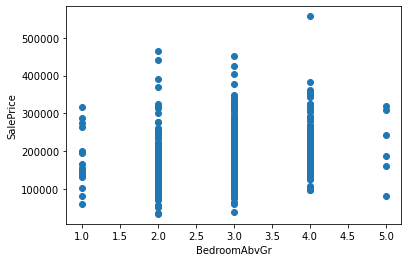

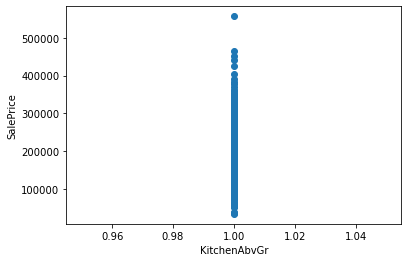

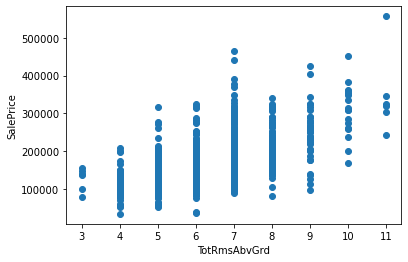

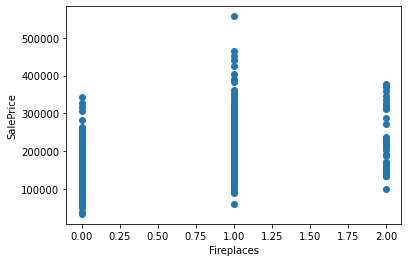

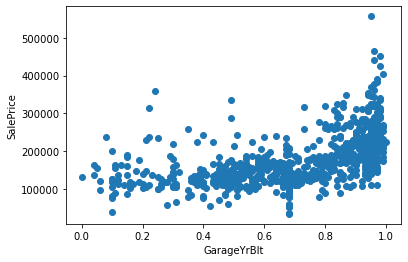

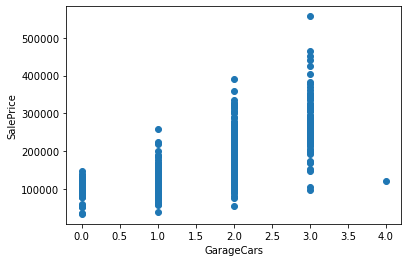

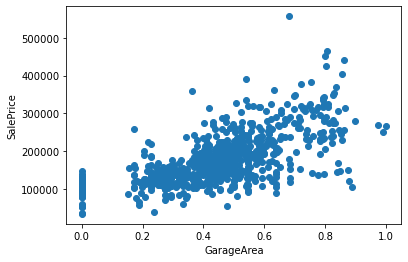

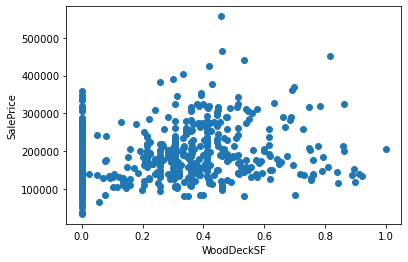

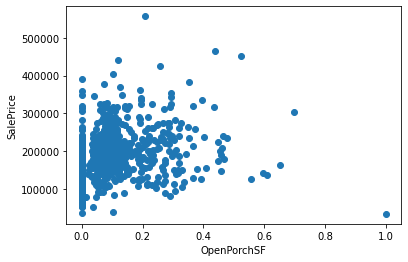

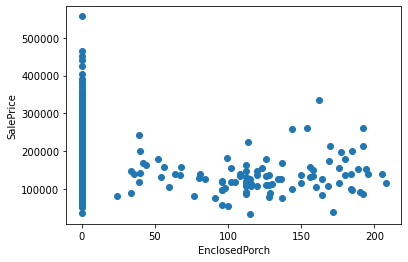

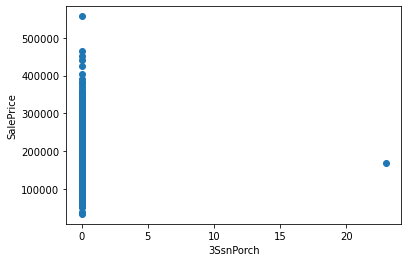

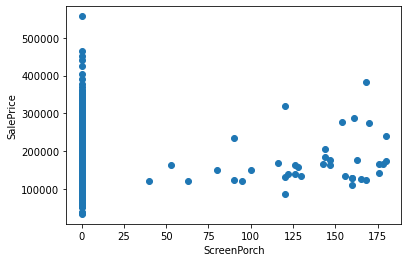

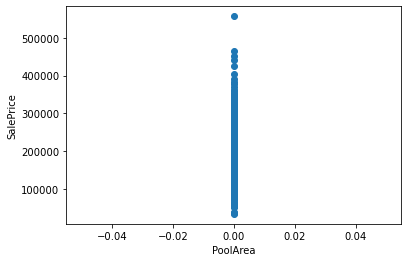

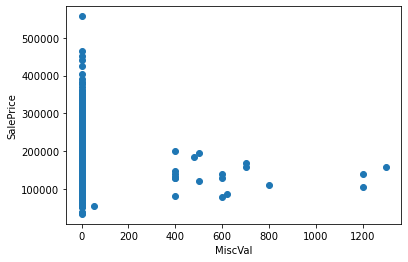

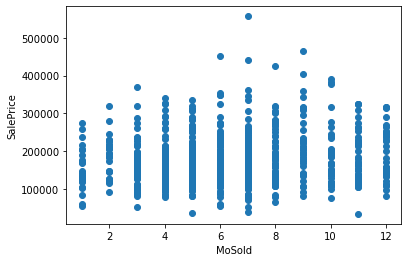

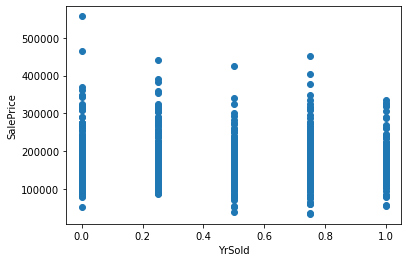

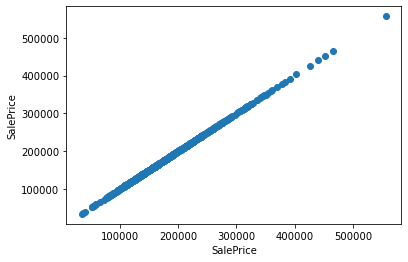

In [54]:
for i in data[num_col]:
    plt.scatter(x=i,y='SalePrice',data=data)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

Scatter plots gives the relation between label and features.

In [55]:
#checking for the top 30 important features which contribute in our label prediction
#importing the ExtraTreesRegressor for selecting features
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [56]:
print(feature_selection.feature_importances_)

[3.00147529e-03 2.93295122e-03 3.99662657e-03 6.21654325e-03
 2.73289330e-05 2.26066319e-03 3.09283094e-03 0.00000000e+00
 2.09670300e-03 2.22346884e-03 3.59340501e-03 8.55892191e-04
 5.66303026e-05 1.07751511e-03 1.88203847e-03 2.17119151e-01
 5.68429564e-03 3.60526653e-02 2.80069446e-03 1.78913220e-03
 2.99071137e-05 3.71183455e-03 3.31970012e-03 2.45650118e-03
 2.72460958e-03 6.04851141e-02 1.26583270e-03 1.42680756e-03
 7.37053877e-02 1.17214227e-03 2.19867839e-03 6.02536073e-03
 1.58203451e-02 3.59095175e-04 3.37825550e-04 3.70744582e-03
 1.70783277e-02 1.96857661e-04 2.07693002e-03 1.31577407e-02
 4.57194737e-04 1.12176109e-02 1.42323512e-02 8.95680660e-05
 7.03780932e-02 1.31576300e-02 0.00000000e+00 1.97257004e-01
 1.17115779e-02 6.38064084e-03 0.00000000e+00 2.89847588e-02
 6.20829707e-03 1.24622189e-03 6.97147697e-03 2.39011933e-03
 4.79881261e-03 3.32003305e-03 5.15864238e-03 6.49572052e-02
 1.83449551e-02 2.96441611e-04 2.79528444e-04 2.38517884e-03
 3.65876959e-03 3.760041

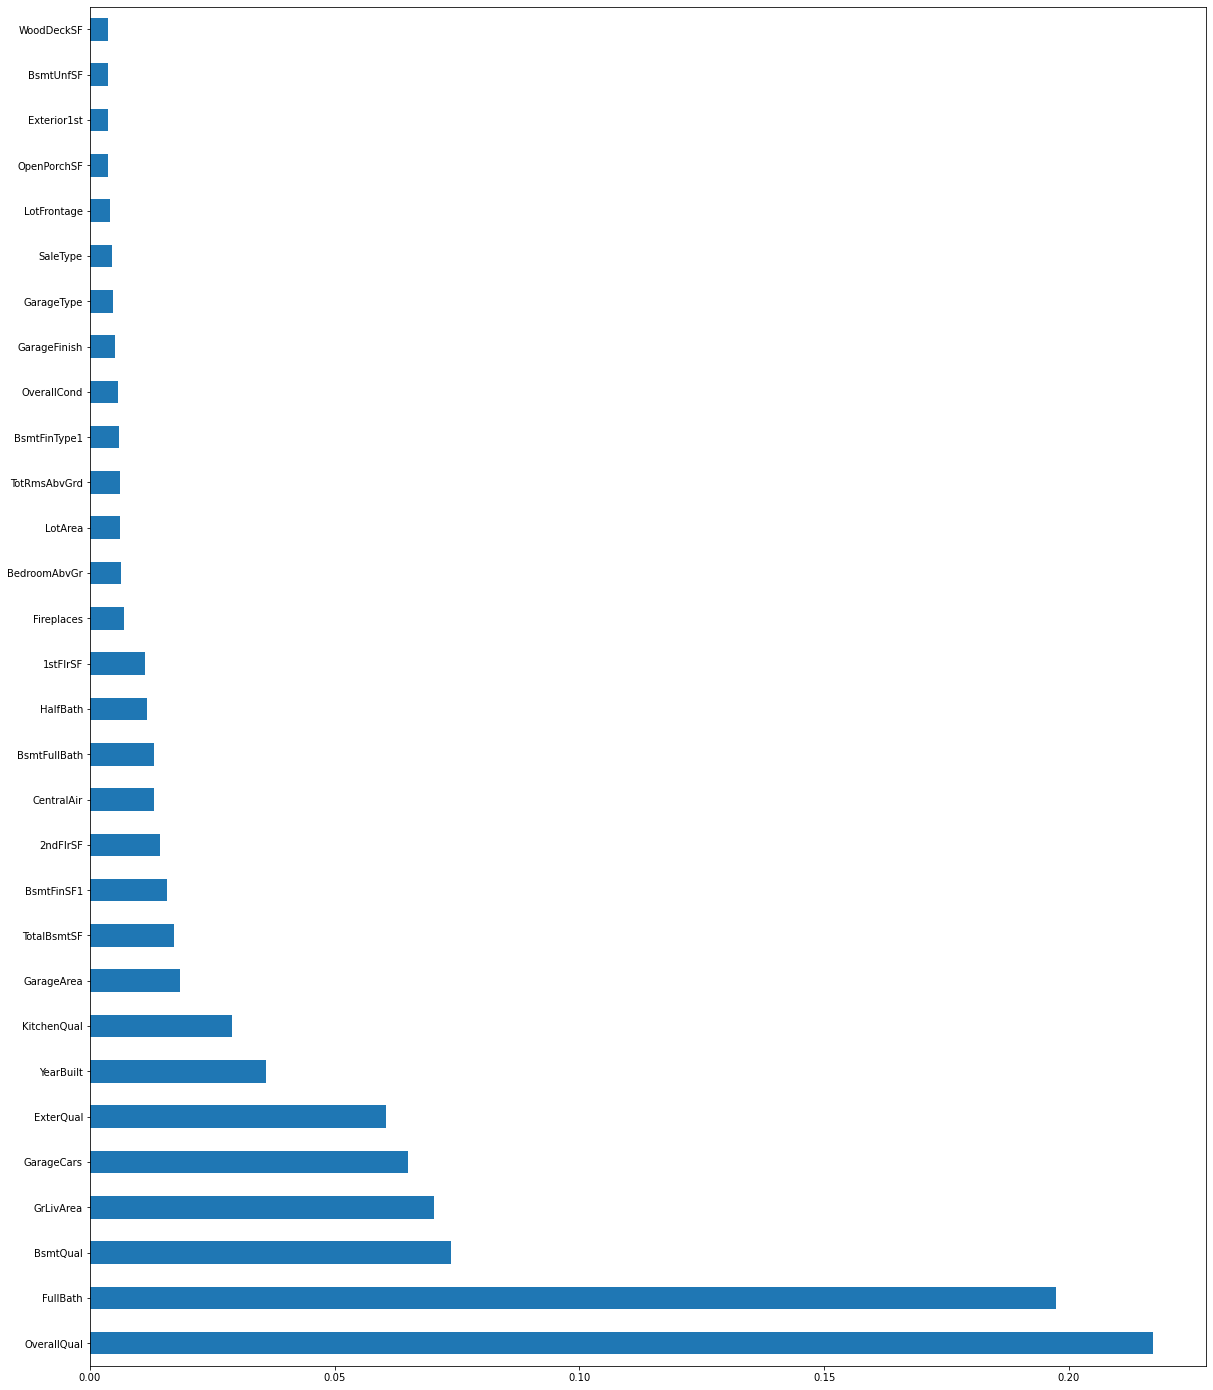

In [57]:
plt.figure(figsize=(20,25))
feature_importances=pd.Series(feature_selection.feature_importances_,index=x.columns)
feature_importances.nlargest(30).plot(kind='barh')
plt.show()

OverallQual is contributing more for label prediction 

### Train Test Split

In [58]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

### Feature Selection

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [60]:
feature_selection=SelectFromModel(Lasso(alpha=0.005,random_state=45))
feature_selection.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=45))

In [61]:
feature_selection.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [62]:
selected_feature=x_train.columns[(feature_selection.get_support())]
len(selected_feature)

71

Among 75 features, 71 features are contributing more. 

### Regression Models

In [63]:
#importing all the required libraries to build our model
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear Regression

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.9113162039676825
Testing_score 0.8665535440619396
Cross validation score:  86.98037770924225
Mean squared error 674219239.4745083
RMSE 25965.73202269692


### KNeighbors Regression

In [65]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))


Training_score 0.7310631482834046
Testing_score 0.43717732164501555
Cross validation score:  57.44847690498235
Mean squared error 2843581536.0704203
RMSE 53325.242953693334


### DecisionTree Regression

In [66]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))


Training_score 1.0
Testing_score 0.7102163352801599
Cross validation score:  67.40170888428494
Mean squared error 1464090752.1008403
RMSE 38263.4388431155


### RandomForest Regression

In [67]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))


Training_score 0.9826350496613903
Testing_score 0.8134022629171374
Cross validation score:  86.13277640246454
Mean squared error 942758528.1250631
RMSE 30704.373110764907


### Support Vector Regression

In [68]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print('Training_score',svm.score(x_train,y_train))
print('Testing_score',svm.score(x_test,y_test))
scr=cross_val_score(svm,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_svm))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_svm)))


Training_score -0.051492671903972775
Testing_score -0.20812540577655114
Cross validation score:  -5.8846417499888215
Mean squared error 6103881789.491436
RMSE 78127.34341759891


### AdaBoost Regression

In [69]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
scr=cross_val_score(ab,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))


Training_score 0.9223121466811165
Testing_score 0.7889009003935663
Cross validation score:  82.17116541838386
Mean squared error 1066548177.6186304
RMSE 32658.04920105655


### Lasso Regression

In [70]:
lar=Lasso()
lar.fit(x_train,y_train)
y_pred_lar=lar.predict(x_test)
print('Training_score',lar.score(x_train,y_train))
print('Testing_score',lar.score(x_test,y_test))
scr=cross_val_score(lar,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_lar))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lar)))


Training_score 0.9113140740897614
Testing_score 0.8665202958343
Cross validation score:  86.9890447479324
Mean squared error 674387221.4159954
RMSE 25968.966506505323


### Ridge Regression

In [71]:
rdg=Ridge()
rdg.fit(x_train,y_train)
y_pred_rdg=rdg.predict(x_test)
print('Training_score',rdg.score(x_train,y_train))
print('Testing_score',rdg.score(x_test,y_test))
scr=cross_val_score(rdg,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_rdg))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rdg)))


Training_score 0.9093302490296838
Testing_score 0.8620145701702391
Cross validation score:  87.0044747164459
Mean squared error 697151759.5159352
RMSE 26403.631559236983


### Extreme gradient boost regression

In [72]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
#Finding cross val score
scr=cross_val_score(xgb,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))


training score: 0.9999922329993265
testing score: 0.8114264783675722
Cross validation score:  85.48945950601679
Mean squared error 952740898.5597762
RMSE 30866.501236126136


### Actual Prediction using test dataset

In [73]:
y_pred_test_lr=lr.predict(data1)

In [74]:
y_pred_test_knn=knn.predict(data1)

In [75]:
y_pred_test_dt=dt.predict(data1)

In [76]:
y_pred_test_rf=rf.predict(data1)

In [77]:
y_pred_test_svm=svm.predict(data1)

In [78]:
y_pred_test_xgb=xgb.predict(data1)

In [ ]:
#Joining predicted Price values to the test dataset

In [79]:
data1['SalePrice']=y_pred_test_rf

In [80]:
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0000,2,0.774825,0.717073,0,0,1,0,0,0,0.909091,2,0,0,2,9,5,0.967742,0.933333,3,0,8,9,3,0.342466,1,1,2,0,2,1,2,0.758809,3,0,0.383913,0.910900,0,0,1,3,0.927396,0.000000,0.0,0.714668,1,0,2,0,3,1,2,8,3,1,2,0,0.944444,0,3,0.642586,4,4,2,0.397321,0.217949,0,0,0,0,0,7,0.25,4,2,348523.64
1,0.6250,2,0.616452,0.381208,0,0,3,0,1,0,0.909091,2,0,3,2,8,5,0.798387,0.566667,1,0,4,4,2,0.000000,1,1,1,2,2,0,2,0.629405,3,0,0.104963,0.578199,0,2,1,3,0.681916,0.000000,0.0,0.525497,1,0,1,0,1,1,2,4,3,1,0,0,0.711111,1,2,0.537072,4,4,2,0.140625,0.000000,0,0,0,0,0,8,0.75,0,0,232326.30
2,0.0000,2,0.616452,0.649556,0,3,3,0,4,0,0.136364,2,0,0,2,8,5,0.935484,0.850000,3,0,8,9,2,0.000000,1,1,2,2,2,0,5,0.000000,3,0,1.000000,0.830806,0,0,1,3,0.876101,0.000000,0.0,0.675139,0,0,2,0,3,1,0,7,3,1,3,0,0.900000,1,2,0.496198,4,4,2,0.450893,0.645299,0,0,0,0,0,6,0.75,4,2,262628.69
3,0.3125,2,0.690836,0.654685,0,3,0,0,4,0,0.181818,2,0,0,3,7,7,0.451613,0.000000,1,0,5,6,2,0.000000,2,1,1,3,2,3,4,0.167072,3,0,0.244723,0.333649,0,0,1,3,0.356747,0.516887,0.0,0.601931,0,0,1,1,3,1,1,7,3,1,2,0,0.233333,2,1,0.222433,4,4,2,0.000000,0.000000,0,0,0,0,0,7,0.75,4,2,168240.10
4,0.2500,2,0.774825,0.728651,0,0,3,0,1,0,0.863636,1,0,0,3,6,5,0.983871,0.950000,1,0,8,9,3,0.126712,1,1,2,2,2,2,5,0.000000,3,0,0.509983,0.423697,0,0,1,3,0.384251,0.762849,0.0,0.717790,0,0,2,1,4,1,2,9,3,1,2,2,0.966667,0,3,0.634981,4,4,2,0.223214,0.076923,0,0,0,0,0,1,0.50,4,2,208371.25


### Creating a tabel for all the algorithms

In [81]:
Model=[]
Model.append(('Linear Regression',lr))
Model.append(('KNeighbors Regressor',knn))
Model.append(('DecisionTreeClassifier',dt))
Model.append(('RandomForest Regressor',rf))
Model.append(('Extreme Gradient Boost Regressor',xgb))
Model.append(('SVR',svm))
Model.append(('Lasso Regressor',lar))
Model.append(('Ridge Regressor',rdg))


In [82]:
Models=[]
Score=[]
MSE=[]
RMSE=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Model Score
    a=model.score(x_test,y_test)
    print('Model Score: ',a)
    Score.append(a*100)
    print('\n')
    
# MSE
    m=mean_squared_error(y_test,pred)
    print('MSE Score: ',m)
    MSE.append(m)
    print('\n') 
    
# RMSE
    r=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE Score: ',r)
    RMSE.append(r)
    print('\n')


Linear Regression 

LinearRegression()


Model Score:  0.8665535440619396


MSE Score:  674219239.4745083


RMSE Score:  25965.73202269692


KNeighbors Regressor 

KNeighborsRegressor()


Model Score:  0.43717732164501555


MSE Score:  2843581536.0704203


RMSE Score:  53325.242953693334


DecisionTreeClassifier 

DecisionTreeRegressor()


Model Score:  0.702312570570055


MSE Score:  1504023399.2016807


RMSE Score:  38781.740538579244


RandomForest Regressor 

RandomForestRegressor()


Model Score:  0.8205342522215731


MSE Score:  906725166.4971688


RMSE Score:  30111.87749870753


Extreme Gradient Boost Regressor 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estima

### Hyper Parameter Tuning

### Final Model 

### Linear Regression

### Grid Search CV

In [84]:
#Hyper Parameter Tuning using GridSearchCV
params={'fit_intercept':[True,False],"normalize":[True,False]}
grid = GridSearchCV(lr,param_grid=params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [87]:
grid.best_params_

{'fit_intercept': False, 'normalize': True}

### Linear Regression

In [88]:
lr=LinearRegression(fit_intercept=False,normalize=True,n_jobs=-1)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.9113162039676824
Testing_score 0.8665535440619383
Cross validation score:  86.98037770924233
Mean squared error 674219239.474515
RMSE 25965.732022697048


### Lasso Regression

In [142]:
lar=Lasso(alpha=0.01,fit_intercept=True,normalize=True,copy_X=True,max_iter=1000,random_state=45)
lar.fit(x_train,y_train)
y_pred_lar=lar.predict(x_test)
print('Training_score',lar.score(x_train,y_train))
print('Testing_score',lar.score(x_test,y_test))
scr=cross_val_score(lar,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_lar))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lar)))


Training_score 0.9055406647684262
Testing_score 0.8680556494568044
Cross validation score:  86.32111184334343
Mean squared error 505551111.84470123
RMSE 22484.463788240566


### DataFrame

In [83]:
#Making DataFrame
pd.DataFrame({"Models":Models,"Model Score":Score,'Mean Squared Error':MSE,'Root Mean Squared error':RMSE})

,Models,Model Score,Mean Squared Error,Root Mean Squared error
0,Linear Regression,86.655354,6.742192e+08,25965.732023
1,KNeighbors Regressor,43.717732,2.843582e+09,53325.242954
2,DecisionTreeClassifier,70.231257,1.504023e+09,38781.740539
3,RandomForest Regressor,82.053425,9.067252e+08,30111.877499
4,Extreme Gradient Boost Regressor,81.142648,9.527409e+08,30866.501236
5,SVR,-20.812541,6.103882e+09,78127.343418
6,Lasso Regressor,86.652030,6.743872e+08,25968.966507
7,Ridge Regressor,86.201457,6.971518e+08,26403.631559


### Conclusion

In [97]:
print(y_pred_lr[:15])
print(y_test.values[:15])

[348519.10268054 217684.44624842 185898.13089274 127866.68064328
 100230.07232475 308358.15270219 166446.79258555 189688.00608155
 202609.08959656 142641.41675012 124890.18672541 175087.84565897
 128636.59300762 205039.26263286 233822.03980092]
[383970 210000 174000  98600 124500 325300 168000 154000 202500 133000
 130500 176000 134000 187750 239900]


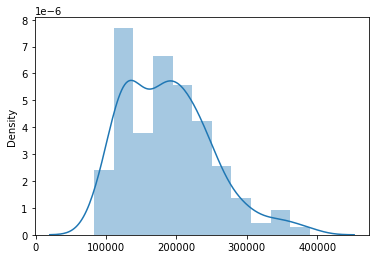

In [98]:
#Scatter plot for test data prediction
sns.distplot(y_pred_lr)
plt.show()

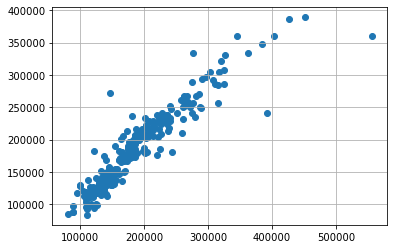

In [99]:
#Scatter plot
plt.scatter(x=y_test, y=y_pred_lr)
plt.grid(True)

By using Linear Regression model we can hit the accuracy of 86%

### saving the model

In [100]:
import joblib
joblib.dump(lr,"Housing Price prediction")

['Housing Price prediction']